<a href="https://colab.research.google.com/github/vini1lol/DataScience/blob/bugfix%2Ferro/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Covid-19


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


## Pegando os dados (dados retirados de https://www.kaggle.com/unanimad/corona-virus-brazil#brazil_covid19.csv)

In [3]:
dados2 = pd.read_csv("/content/drive/My Drive/Meus testes de dados/brazil_covid19.csv")
dados2.head(10)

,date,region,state,cases,deaths
0,2020-02-25,Centro-Oeste,DF,0,0
1,2020-02-25,Centro-Oeste,GO,0,0
2,2020-02-25,Centro-Oeste,MS,0,0
3,2020-02-25,Centro-Oeste,MT,0,0
4,2020-02-25,Nordeste,AL,0,0
5,2020-02-25,Nordeste,BA,0,0
6,2020-02-25,Nordeste,CE,0,0
7,2020-02-25,Nordeste,MA,0,0
8,2020-02-25,Nordeste,PB,0,0
9,2020-02-25,Nordeste,PE,0,0


In [ ]:
dadosLimpo = (dados2['cases']==0) & (dados2['deaths']==0)
dadosLimpo = dados2[~dadosLimpo]
dadosLimpo

,date,region,state,cases,deaths
50,2020-02-26,Sudeste,SP,1,0
77,2020-02-27,Sudeste,SP,1,0
104,2020-02-28,Sudeste,SP,1,0
131,2020-02-29,Sudeste,SP,2,0
158,2020-03-01,Sudeste,SP,2,0
...,...,...,...,...,...
4126,2020-07-26,Sudeste,RJ,156325,12835
4127,2020-07-26,Sudeste,SP,483982,21606
4128,2020-07-26,Sul,PR,67220,1671
4129,2020-07-26,Sul,RS,59779,1571


In [ ]:
dadosLimpo.index = range(dadosLimpo.shape[0])
dadosLimpo.to_csv("/content/drive/My Drive/Meus testes de dados/dados.csv")
dadosLimpo

,date,region,state,cases,deaths
0,2020-02-26,Sudeste,SP,1,0
1,2020-02-27,Sudeste,SP,1,0
2,2020-02-28,Sudeste,SP,1,0
3,2020-02-29,Sudeste,SP,2,0
4,2020-03-01,Sudeste,SP,2,0
...,...,...,...,...,...
3646,2020-07-26,Sudeste,RJ,156325,12835
3647,2020-07-26,Sudeste,SP,483982,21606
3648,2020-07-26,Sul,PR,67220,1671
3649,2020-07-26,Sul,RS,59779,1571


## Dados por estado

In [ ]:
d =dadosLimpo['state'].unique()
d

array(['SP', 'RJ', 'BA', 'ES', 'DF', 'AL', 'MG', 'RS', 'PE', 'PR', 'GO',
       'RN', 'SC', 'SE', 'AM', 'MS', 'CE', 'PB', 'AC', 'PA', 'TO', 'MT',
       'PI', 'AP', 'RO', 'MA', 'RR'], dtype=object)

In [ ]:
estado ={}
casos = 0
mortes = 0
for i in range(len(d)):
  aux = dadosLimpo['state'] == d[i]
  aux = dadosLimpo[aux]
  aux.index = range(aux.shape[0])
  for k in range(aux.shape[0]):
    if aux['cases'][k] > 0:
      casos = aux['cases'][k]
  for k in range(aux.shape[0]):
    if aux['deaths'][k] > 0:
      mortes = aux['deaths'][k]
  estado.update( {d[i]:{"casos":casos,"mortes":mortes}})
estado

{'AC': {'casos': 18745, 'mortes': 486},
 'AL': {'casos': 55376, 'mortes': 1500},
 'AM': {'casos': 96463, 'mortes': 3217},
 'AP': {'casos': 35220, 'mortes': 554},
 'BA': {'casos': 148179, 'mortes': 3182},
 'CE': {'casos': 162085, 'mortes': 7493},
 'DF': {'casos': 96332, 'mortes': 1308},
 'ES': {'casos': 77200, 'mortes': 2411},
 'GO': {'casos': 55914, 'mortes': 1392},
 'MA': {'casos': 113891, 'mortes': 2923},
 'MG': {'casos': 112571, 'mortes': 2429},
 'MS': {'casos': 21514, 'mortes': 305},
 'MT': {'casos': 43331, 'mortes': 1580},
 'PA': {'casos': 148463, 'mortes': 5716},
 'PB': {'casos': 76153, 'mortes': 1698},
 'PE': {'casos': 88466, 'mortes': 6352},
 'PI': {'casos': 46044, 'mortes': 1243},
 'PR': {'casos': 67220, 'mortes': 1671},
 'RJ': {'casos': 156325, 'mortes': 12835},
 'RN': {'casos': 47099, 'mortes': 1678},
 'RO': {'casos': 35810, 'mortes': 814},
 'RR': {'casos': 29829, 'mortes': 473},
 'RS': {'casos': 59779, 'mortes': 1571},
 'SC': {'casos': 68730, 'mortes': 907},
 'SE': {'casos'

In [ ]:
df_estado = pd.DataFrame(estado)
df_estado=df_estado.transpose()
df_estado.reset_index(level=0,inplace= True)
df_estado.rename(columns={'index':'estado'}, inplace=True)
df_estado.head()

,estado,casos,mortes
0,SP,483982,21606
1,RJ,156325,12835
2,BA,148179,3182
3,ES,77200,2411
4,DF,96332,1308


### Casos e mortes por estado

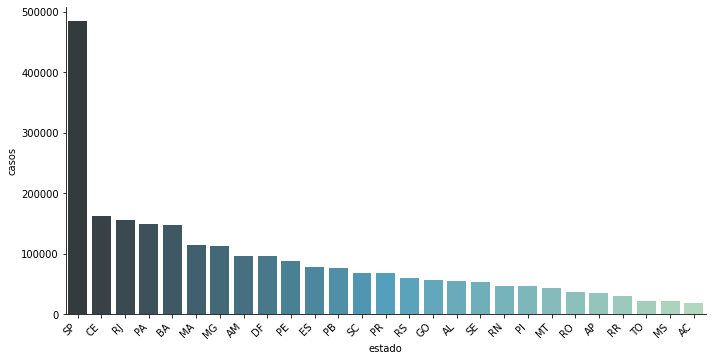

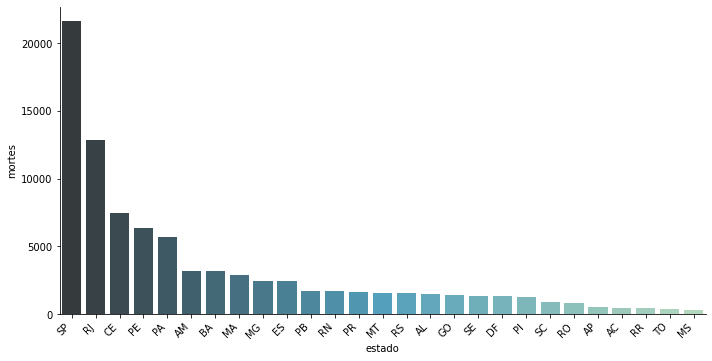

In [ ]:
df_estado.sort_values(by=['casos'], inplace= True, ascending= False)
g = sns.catplot(x='estado',y='casos',data=df_estado, kind="bar",
            palette="GnBu_d", aspect = 2)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
print(g)
df_estado.sort_values(by=['mortes'], inplace= True, ascending= False)
h = sns.catplot(x='estado',y='mortes',data=df_estado, kind="bar",
            palette="GnBu_d", aspect = 2)
for ax in h.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
print(h)
            

## Dados do Brasil

In [ ]:
df_Brasil = dados2[['date','state','cases','deaths']]
df_Brasil.head()

,date,state,cases,deaths
0,2020-02-25,DF,0,0
1,2020-02-25,GO,0,0
2,2020-02-25,MS,0,0
3,2020-02-25,MT,0,0
4,2020-02-25,AL,0,0


In [ ]:
selecao = (df_Brasil['cases'] == 0) & (df_Brasil['deaths'] == 0)
df_Brasil = df_Brasil[~selecao]
df_Brasil.index= range(df_Brasil.shape[0])
df_Brasil

,date,state,cases,deaths
0,2020-02-26,SP,1,0
1,2020-02-27,SP,1,0
2,2020-02-28,SP,1,0
3,2020-02-29,SP,2,0
4,2020-03-01,SP,2,0
...,...,...,...,...
3646,2020-07-26,RJ,156325,12835
3647,2020-07-26,SP,483982,21606
3648,2020-07-26,PR,67220,1671
3649,2020-07-26,RS,59779,1571


In [ ]:
data = df_Brasil['date'].unique()
data

array(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-

In [ ]:
df_Bdata={}
s=0
for i in range(len(data)):
  s=0
  for j in range(df_Brasil.shape[0]):
    if data[i] == df_Brasil['date'][j]:
      s+= df_Brasil['cases'][j]
      df_Bdata.update({data[i]:s})
df_Bdata = pd.DataFrame(df_Bdata,index=['casos'])
df_Bdata = df_Bdata.transpose()
df_Bdata.reset_index(level=0,inplace=True)
df_Bdata.rename(columns={'index':'data'},inplace=True)
df_Bdata.head(10)

,data,casos
0,2020-02-26,1
1,2020-02-27,1
2,2020-02-28,1
3,2020-02-29,2
4,2020-03-01,2
5,2020-03-02,2
6,2020-03-03,2
7,2020-03-04,3
8,2020-03-05,7
9,2020-03-06,13


## Quantidade de casos atual no Brasil

data: 2020-07-26, casos: 2419091
Diferença do dia anterior 24578


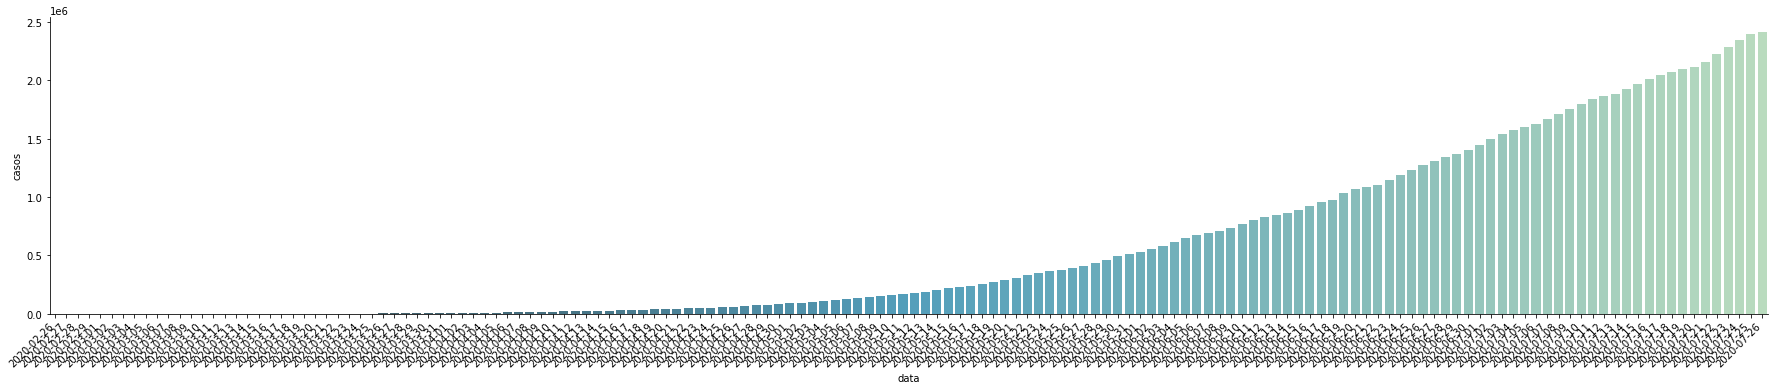

In [ ]:
j = sns.catplot(x='data',y='casos',data=df_Bdata, kind="bar",
            palette="GnBu_d", aspect = 5)
for ax in j.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
print(j)
print('data: {}, casos: {}'.format(df_Bdata['data'][len(data)-1], df_Bdata['casos'][len(data)-1]))
print('Diferença do dia anterior {}'.format(df_Bdata['casos'][len(data)-1]-df_Bdata['casos'][len(data)-2]))

#Computando os dados de mortes confirmadas

In [ ]:
df_Bdatad={}
s=0
for i in range(len(data)):
  s=0
  for t in range(df_Brasil.shape[0]):
    if data[i] == df_Brasil['date'][t]:
      s+= df_Brasil['deaths'][t]
      df_Bdatad.update({data[i]:s})
df_Bdatad = pd.DataFrame(df_Bdatad,index=['deaths'])
df_Bdatad = df_Bdatad.transpose()
df_Bdatad.reset_index(level=0,inplace=True)
df_Bdatad.rename(columns={'index':'data'},inplace=True)
df_Bdatad.head(10)

,data,deaths
0,2020-02-26,0
1,2020-02-27,0
2,2020-02-28,0
3,2020-02-29,0
4,2020-03-01,0
5,2020-03-02,0
6,2020-03-03,0
7,2020-03-04,0
8,2020-03-05,0
9,2020-03-06,0


##Quantidade de mortes atual

data: 2020-07-26, mortes: 87004
Diferença do dia anterior 555


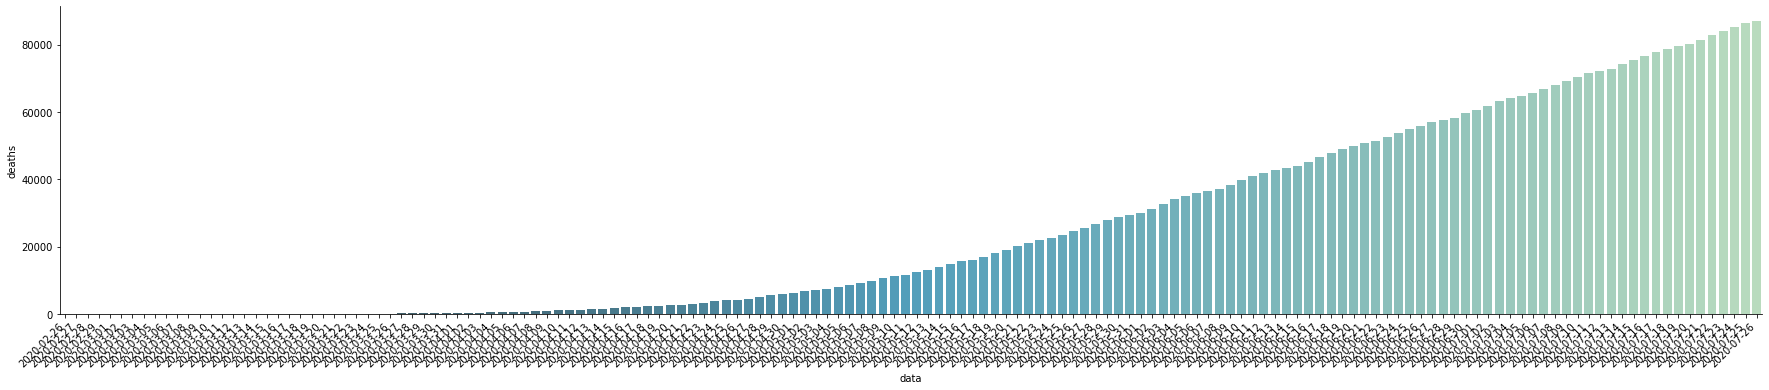

In [ ]:
k = sns.catplot(x='data',y='deaths',data=df_Bdatad, kind="bar",
            palette="GnBu_d", aspect = 5)
for ax in k.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

print(k)
print('data: {}, mortes: {}'.format(df_Bdatad['data'][len(data)-1],df_Bdatad['deaths'][len(data)-1]))
print('Diferença do dia anterior {}'.format(df_Bdatad['deaths'][len(data)-1]-df_Bdatad['deaths'][len(data)-2]))

#Crescimento em cada estado

In [ ]:
dadosPorEstado = {}
for i in range(len(d)):
  dadosPorEstado.update({d[i]:{}})
d[0]

'SP'

In [ ]:
for i in range(len(d)):
  dadosPorEstado[d[i]] = dadosLimpo[dadosLimpo['state'] == d[i]]
ddframe = dadosPorEstado
dadosPorEstado
frame = pd.DataFrame()
for i in range(len(d)):
  dd = pd.DataFrame(ddframe[d[i]])
  dd.index= range(dd.shape[0])
  frame = pd.concat([frame,dd])
frame.to_csv("/content/drive/My Drive/Meus testes de dados/dadosestado.csv")
frame

,date,region,state,cases,deaths
0,2020-02-26,Sudeste,SP,1,0
1,2020-02-27,Sudeste,SP,1,0
2,2020-02-28,Sudeste,SP,1,0
3,2020-02-29,Sudeste,SP,2,0
4,2020-03-01,Sudeste,SP,2,0
...,...,...,...,...,...
122,2020-07-22,Norte,RR,26954,451
123,2020-07-23,Norte,RR,27932,458
124,2020-07-24,Norte,RR,28874,465
125,2020-07-25,Norte,RR,29394,473


## Numero Casos


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


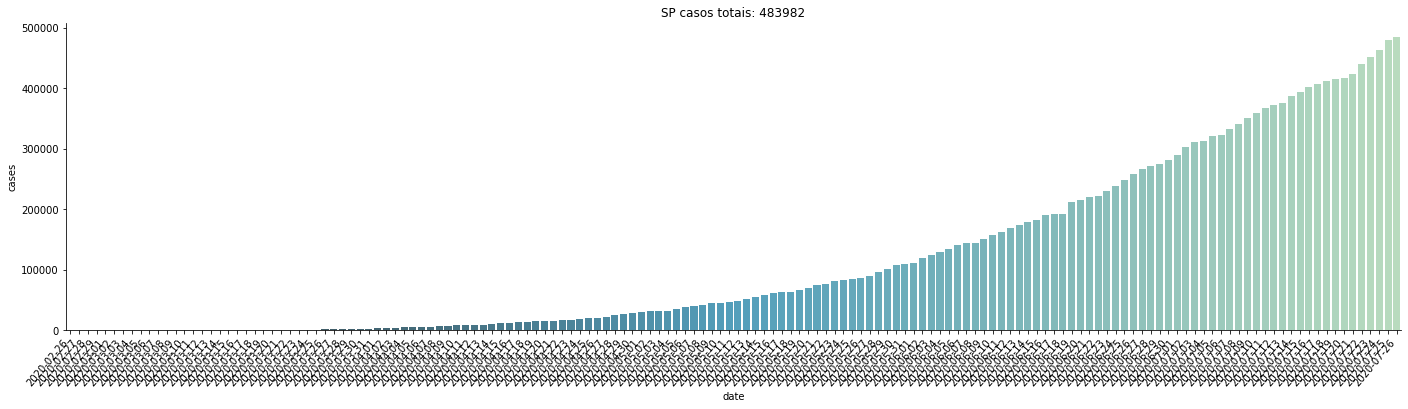

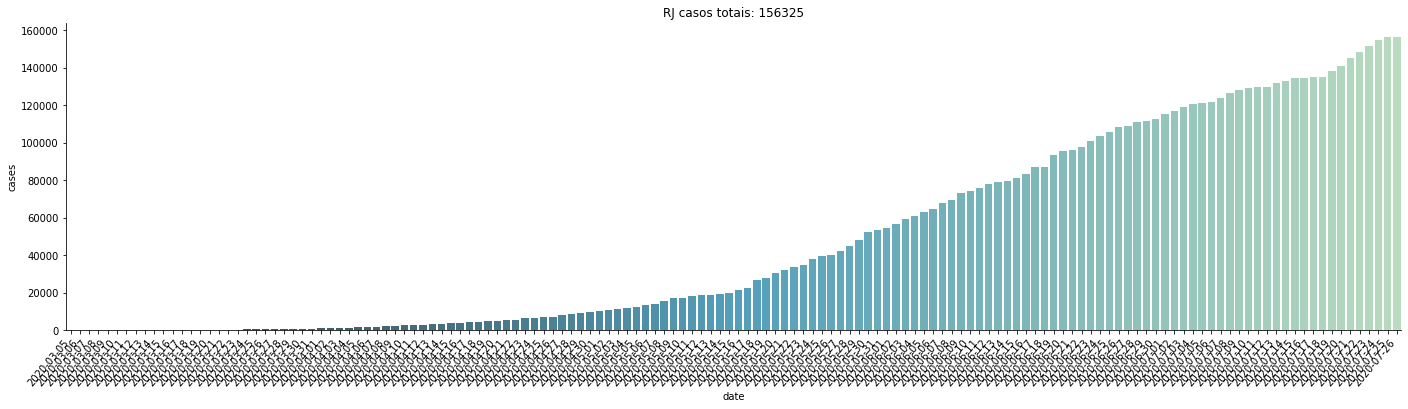

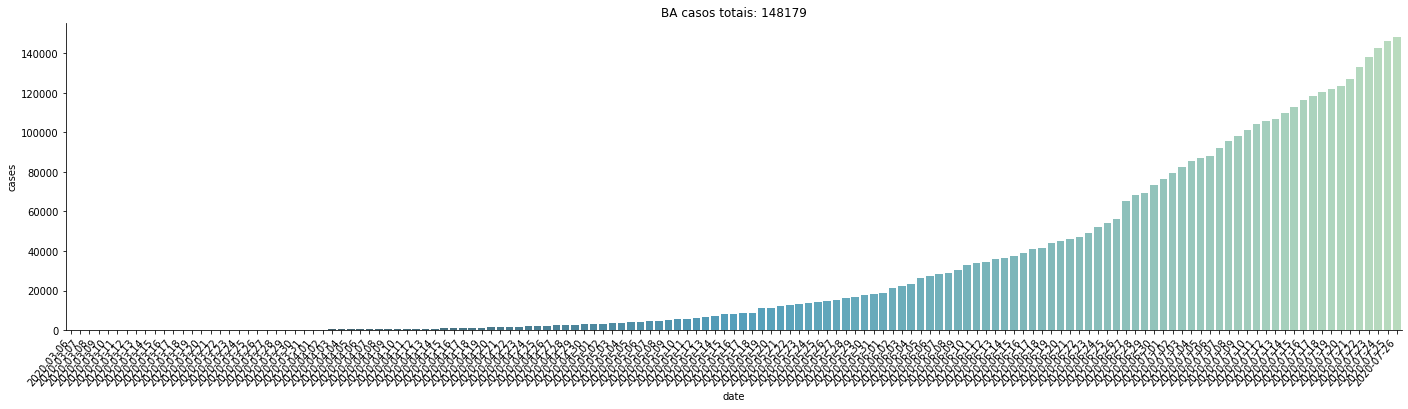

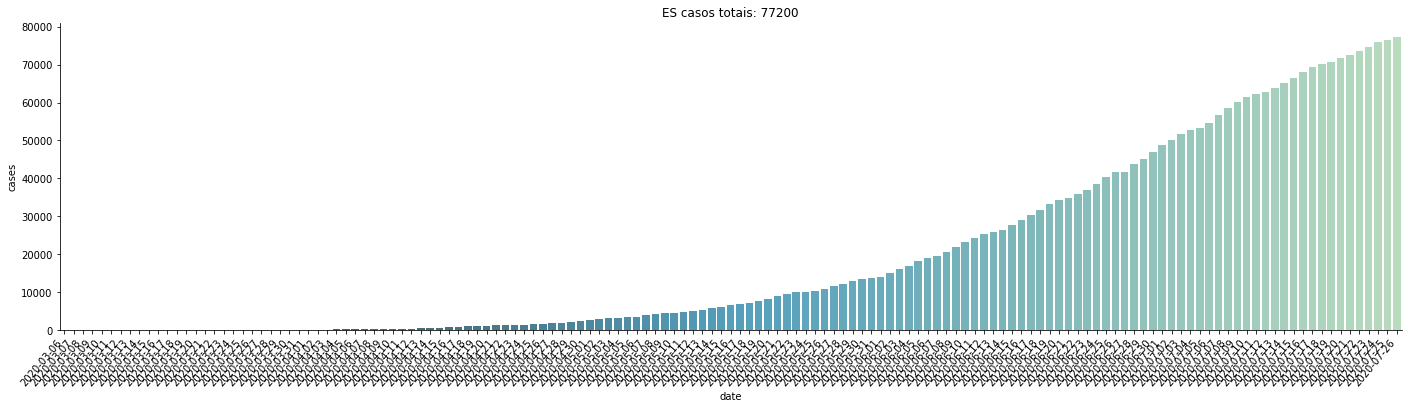

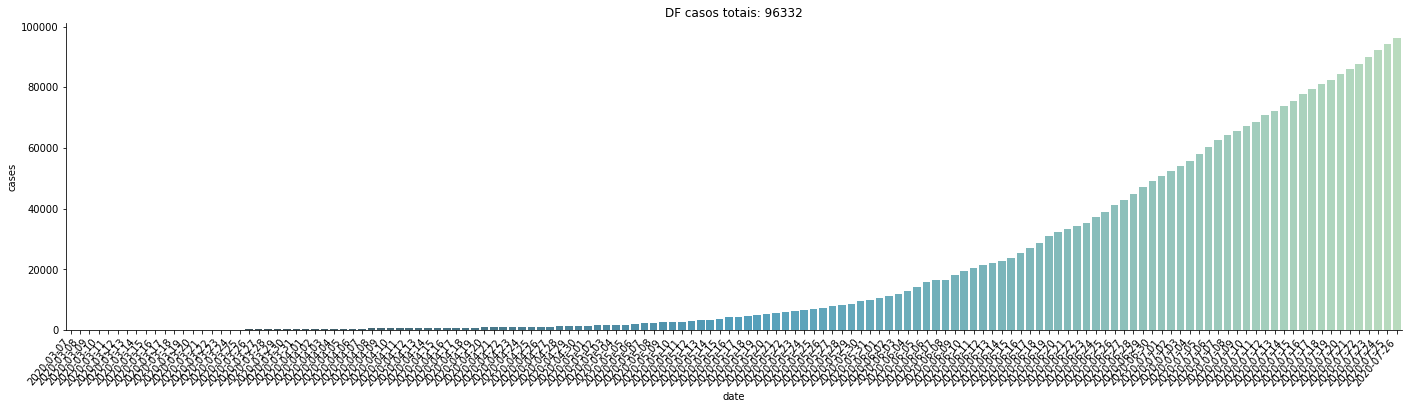

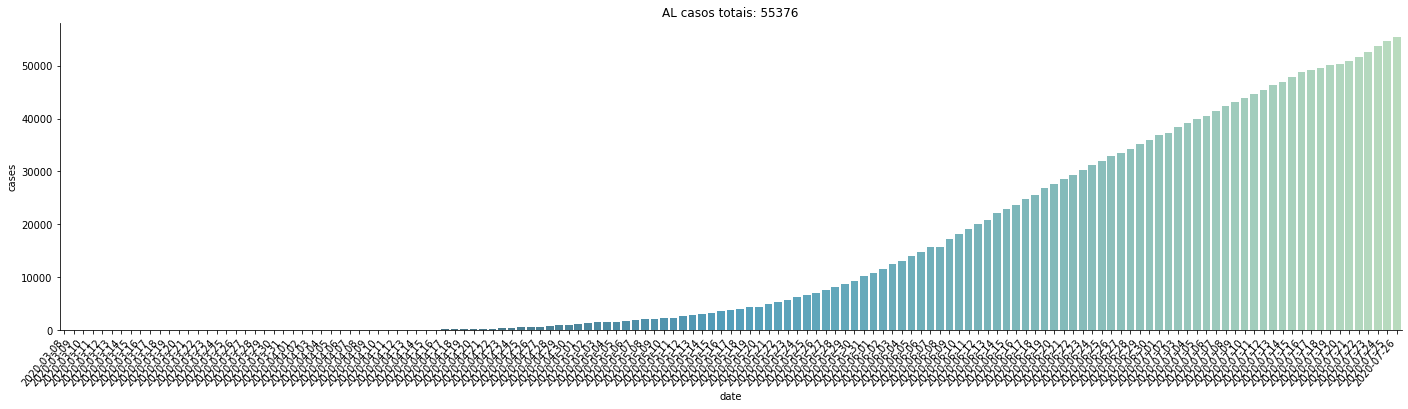

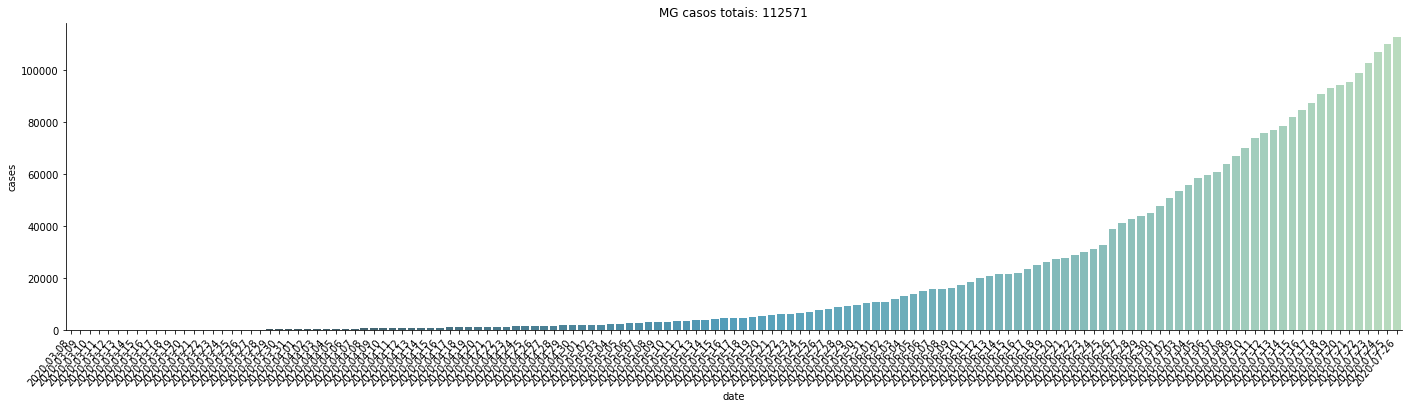

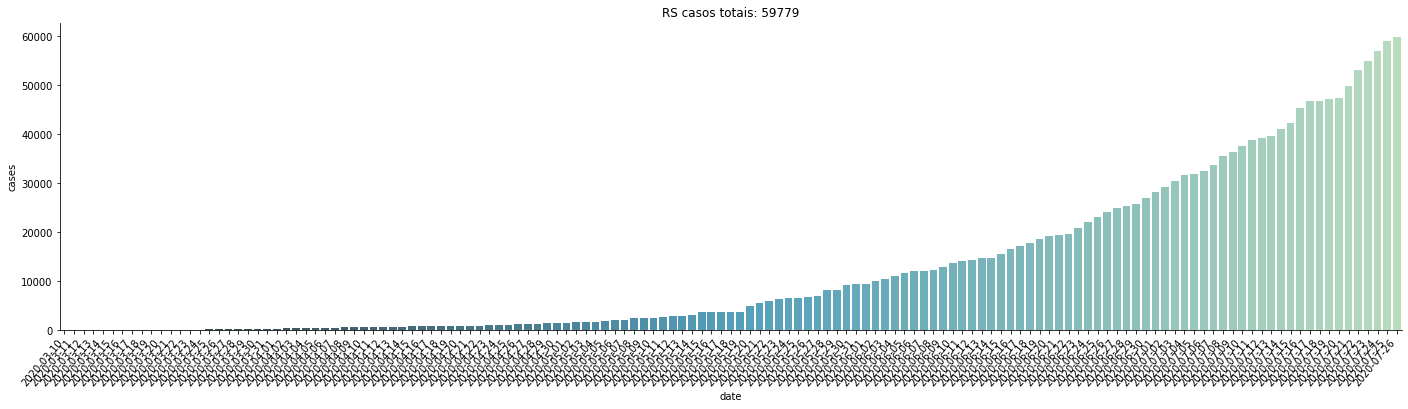

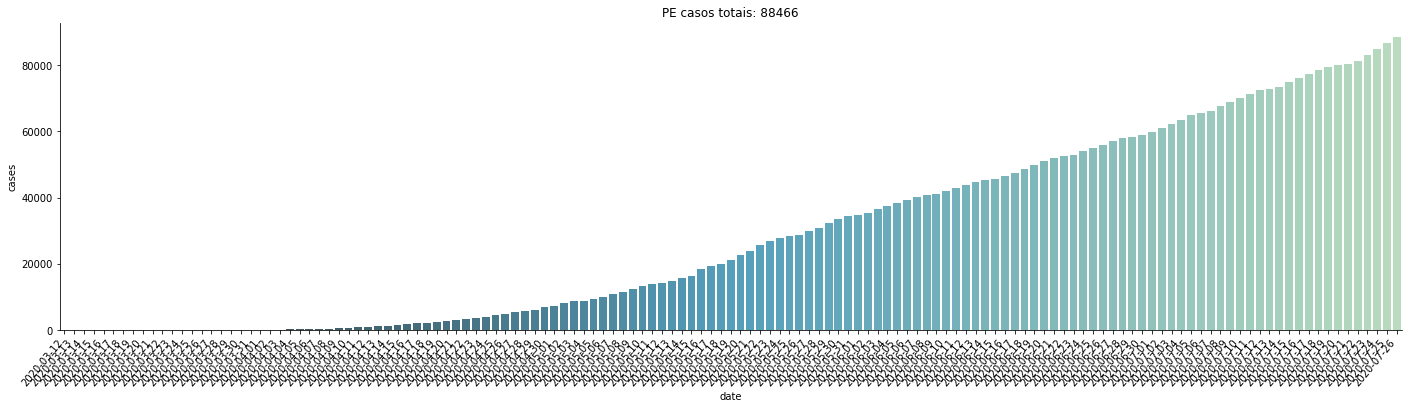

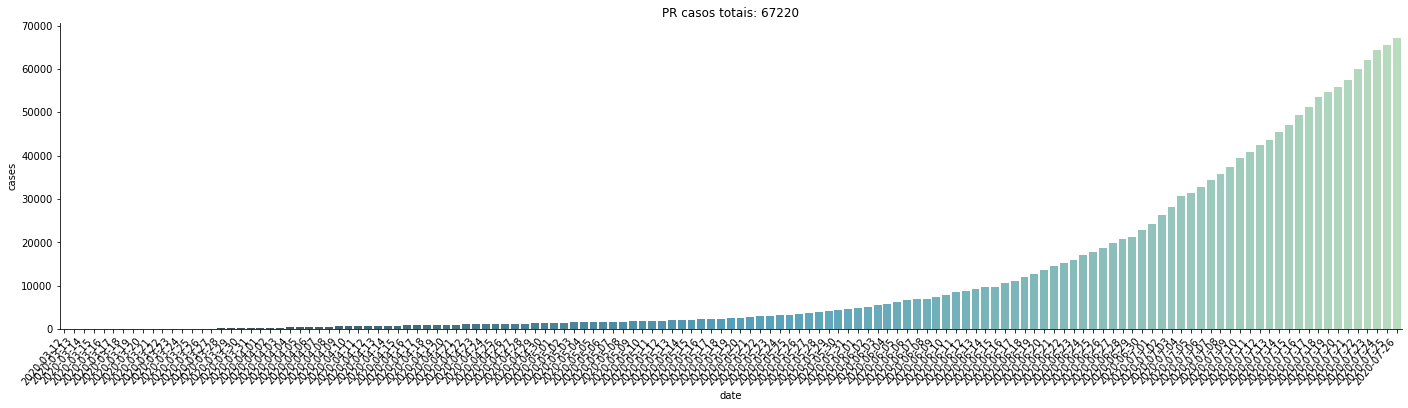

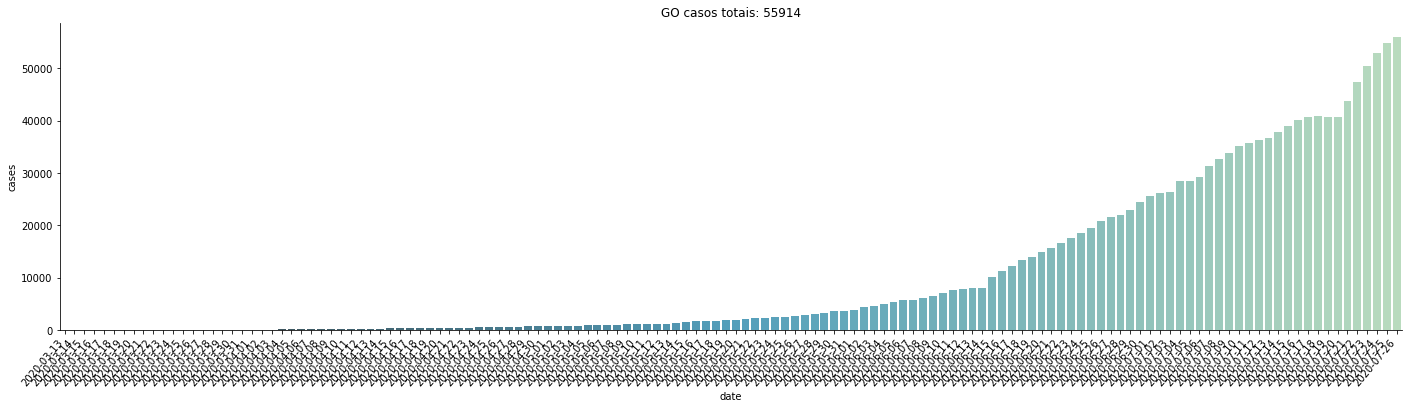

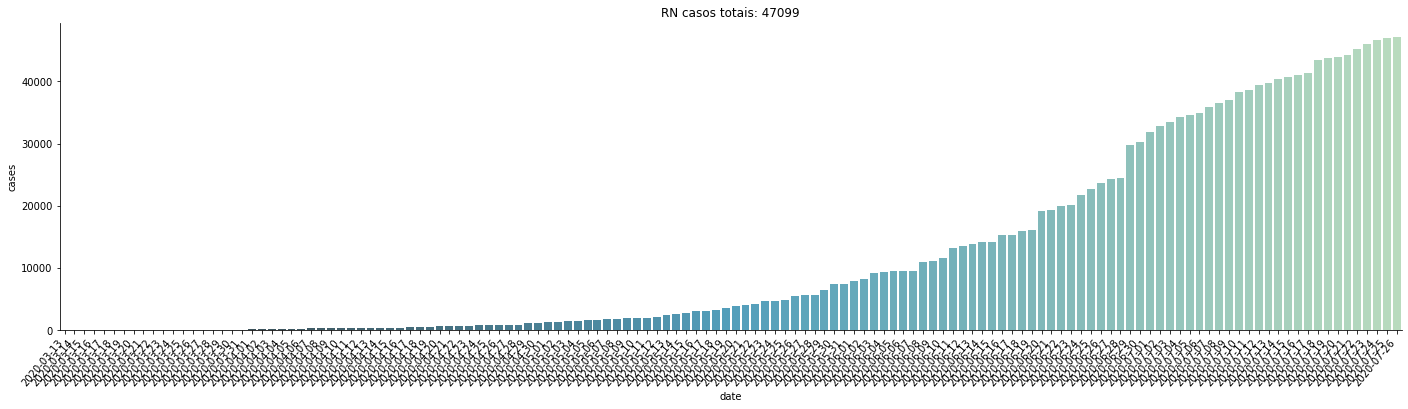

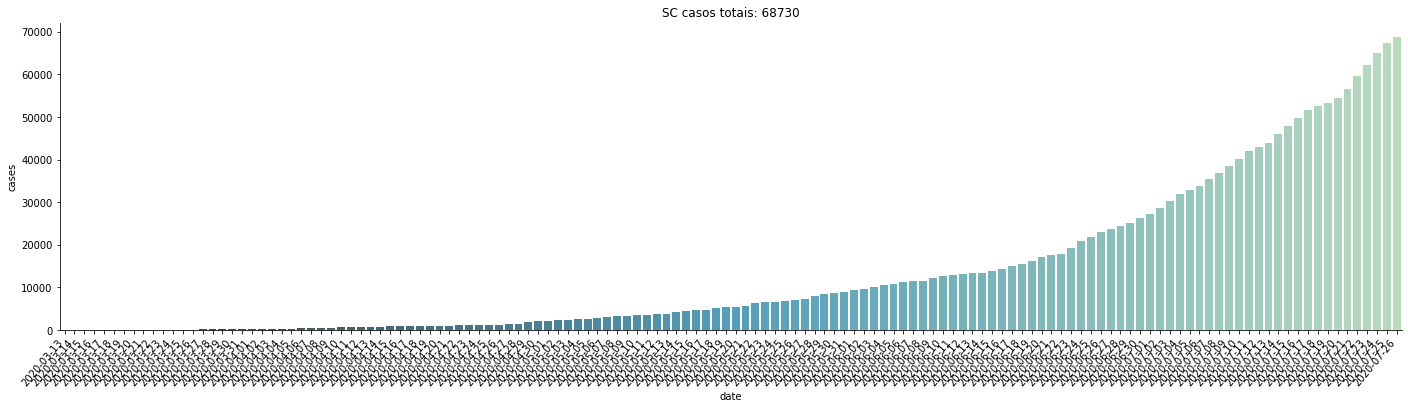

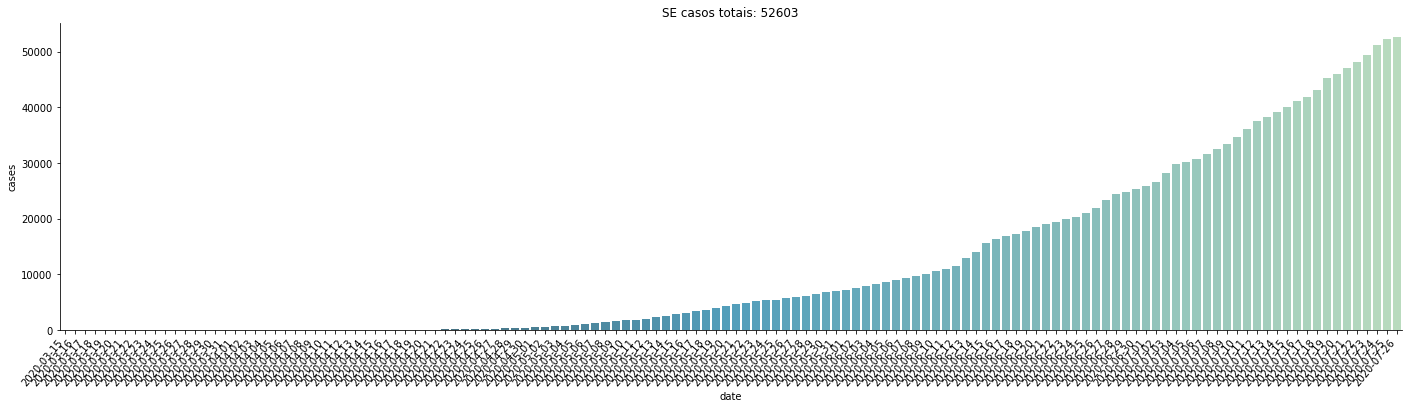

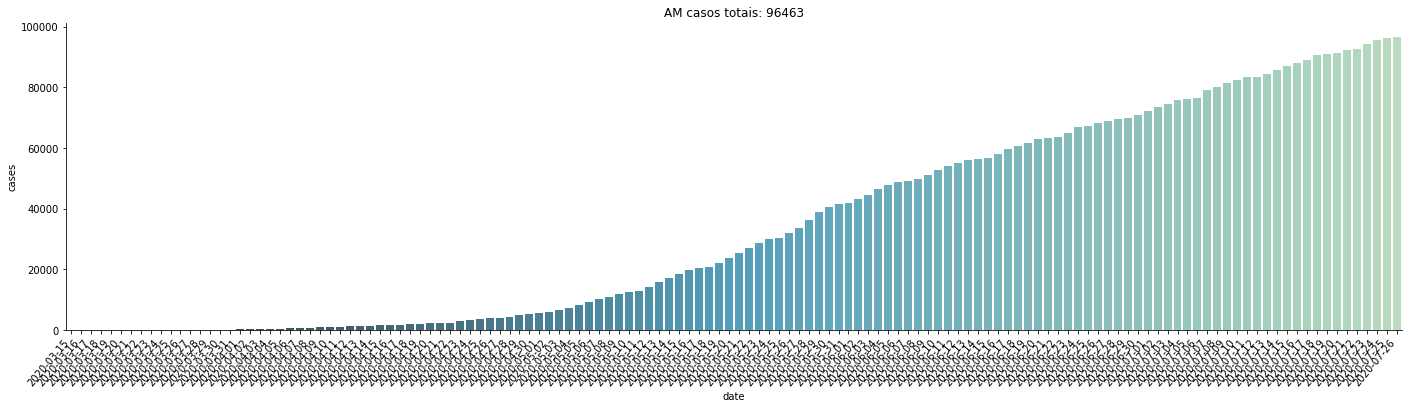

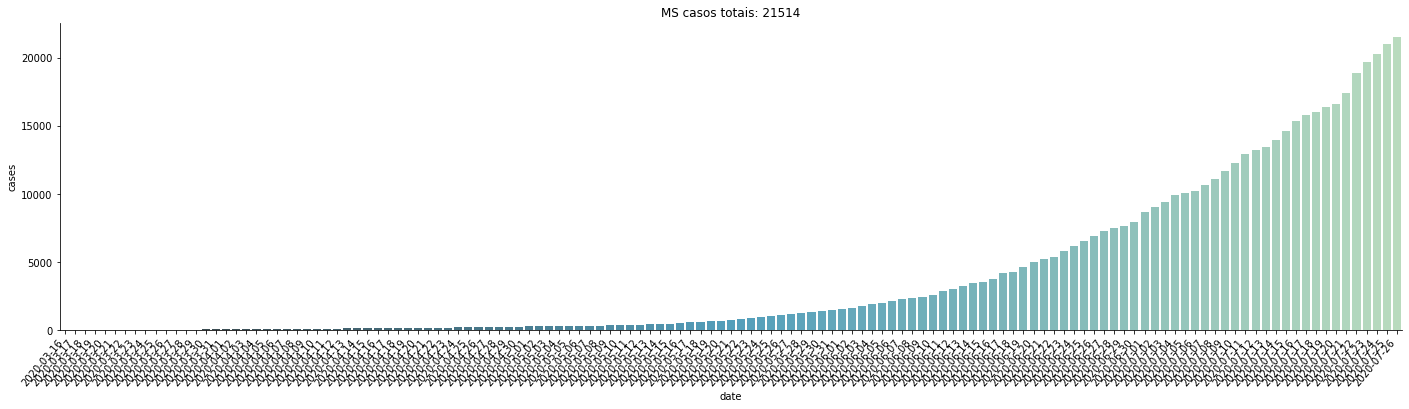

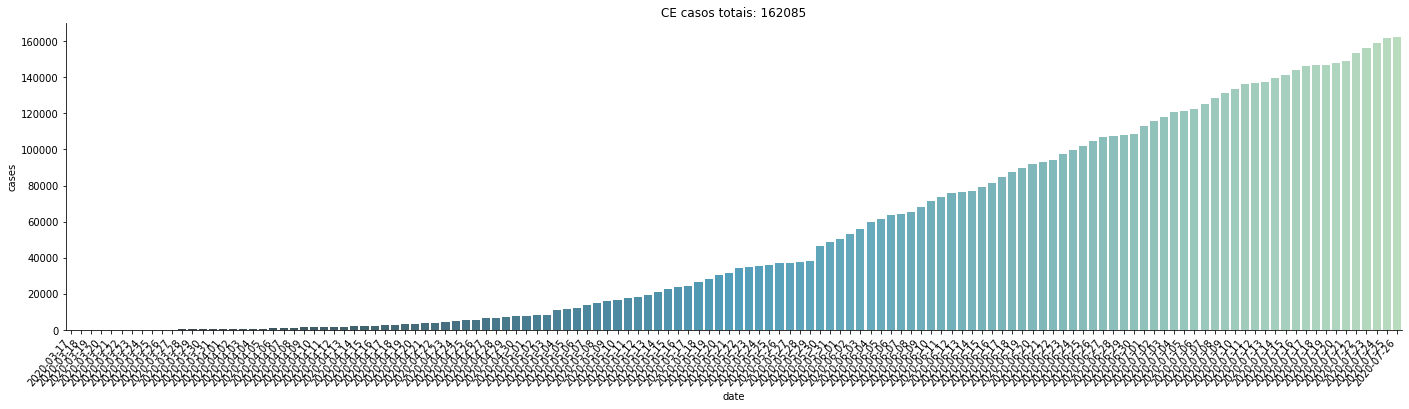

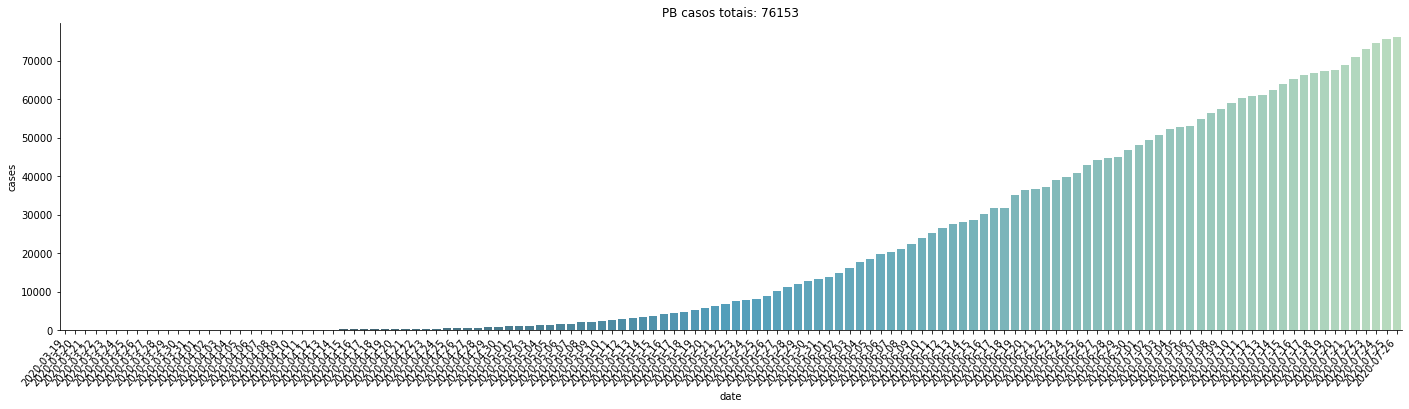

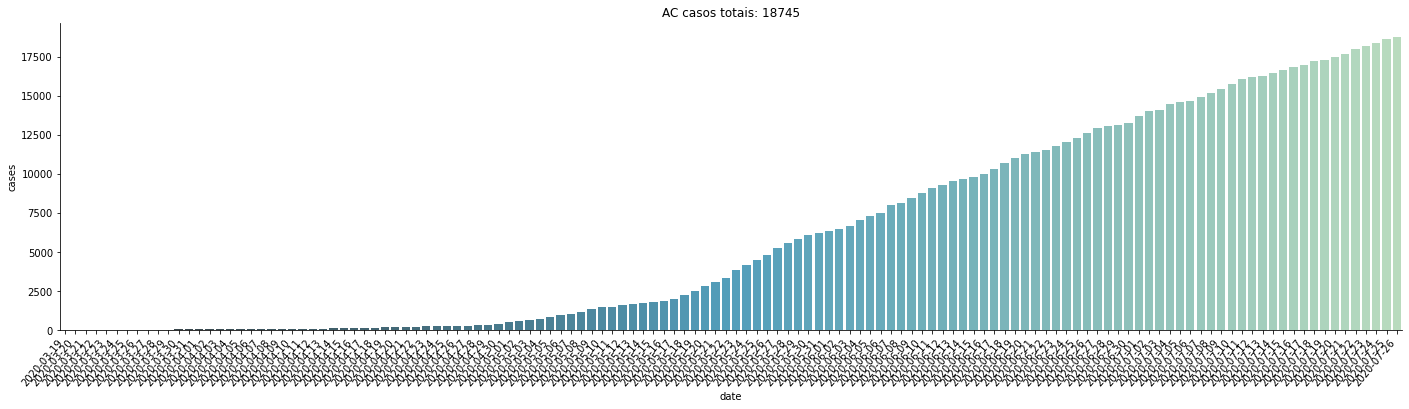

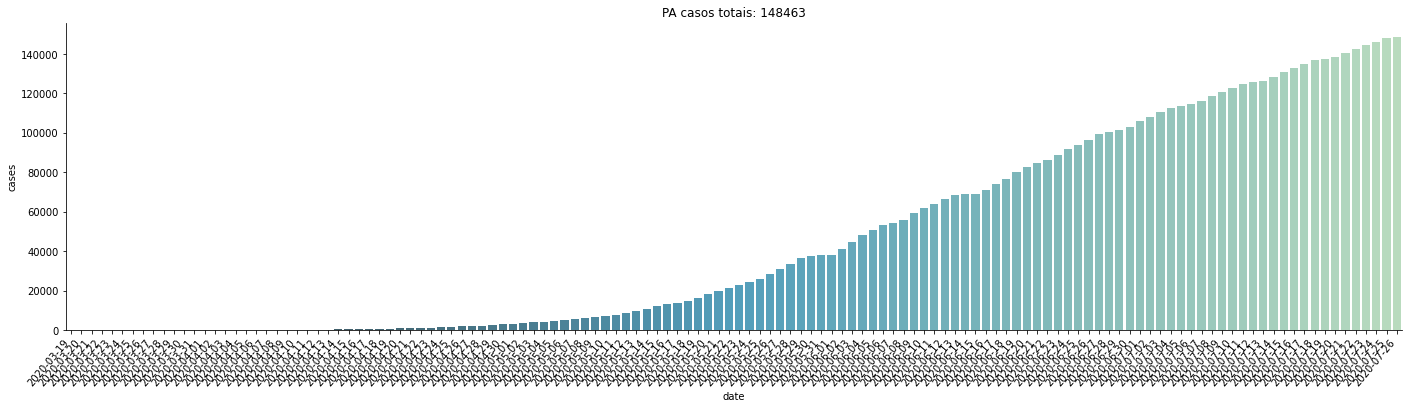

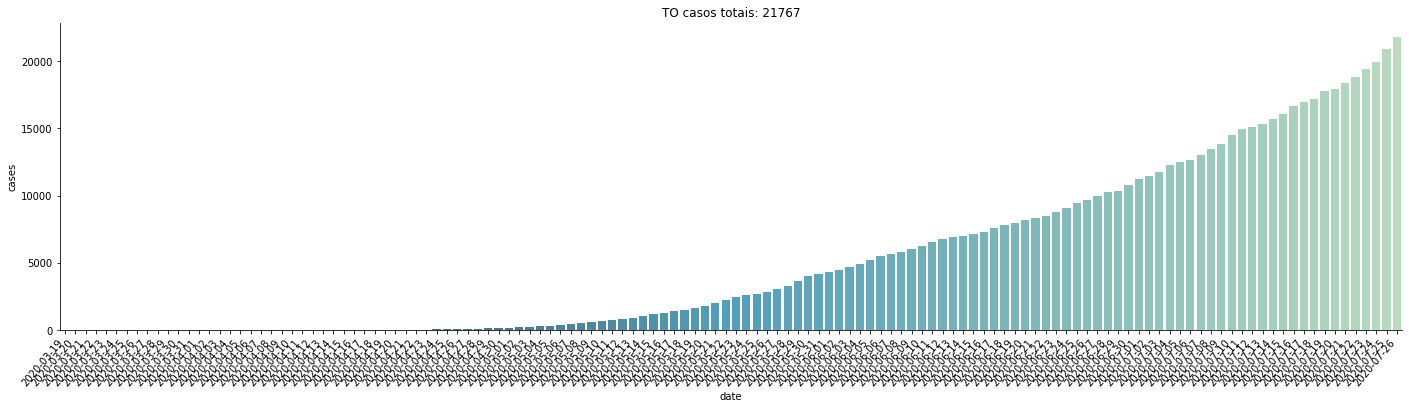

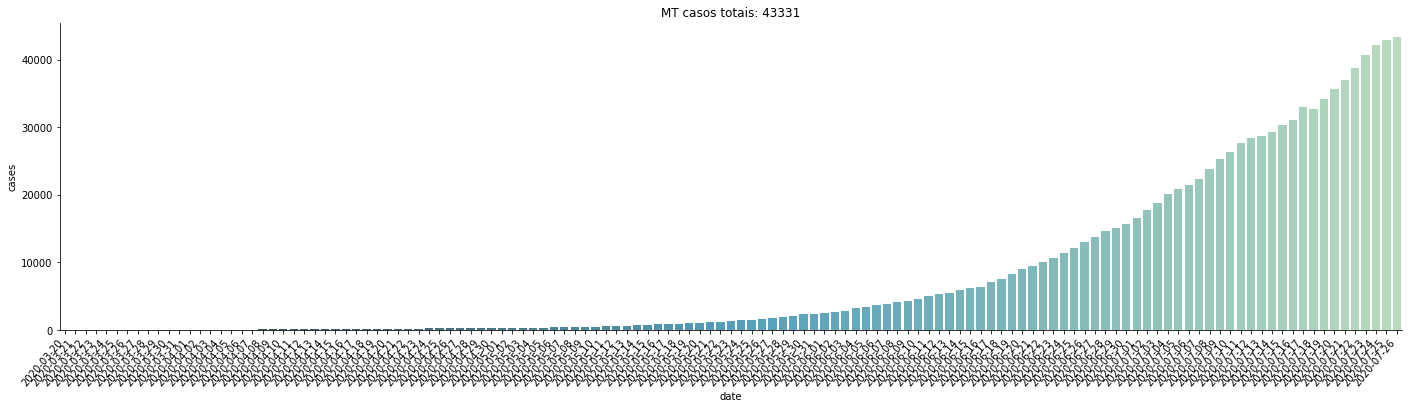

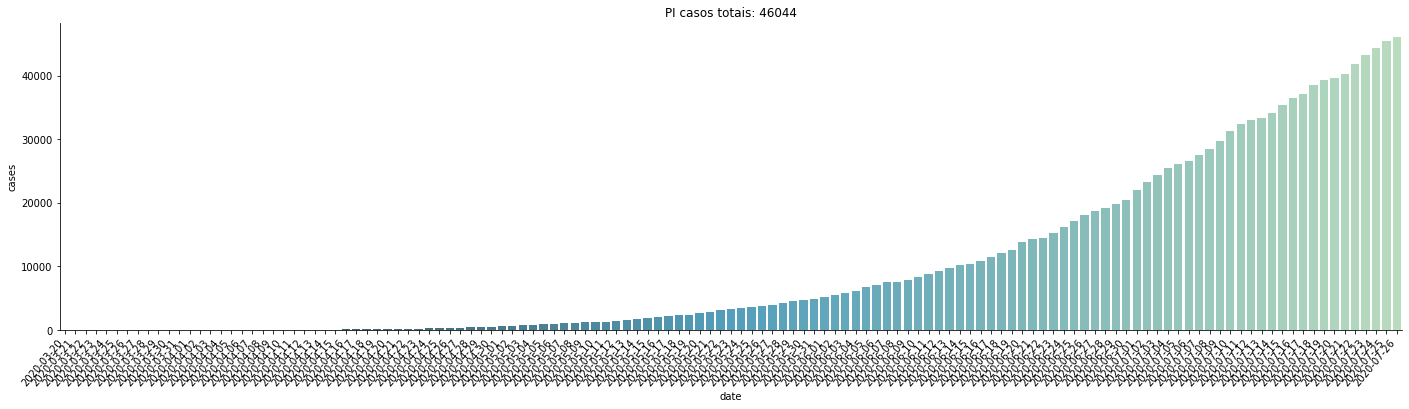

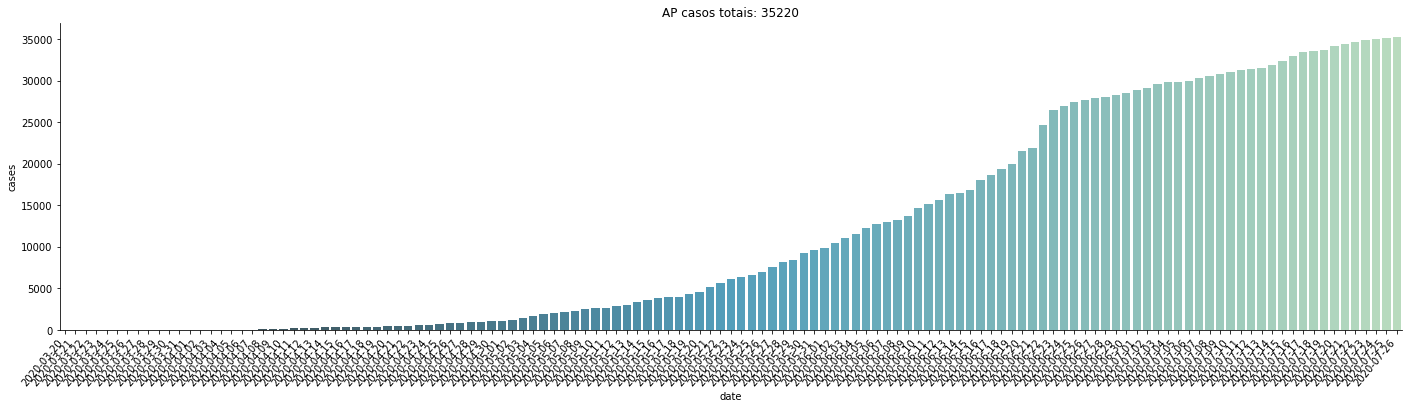

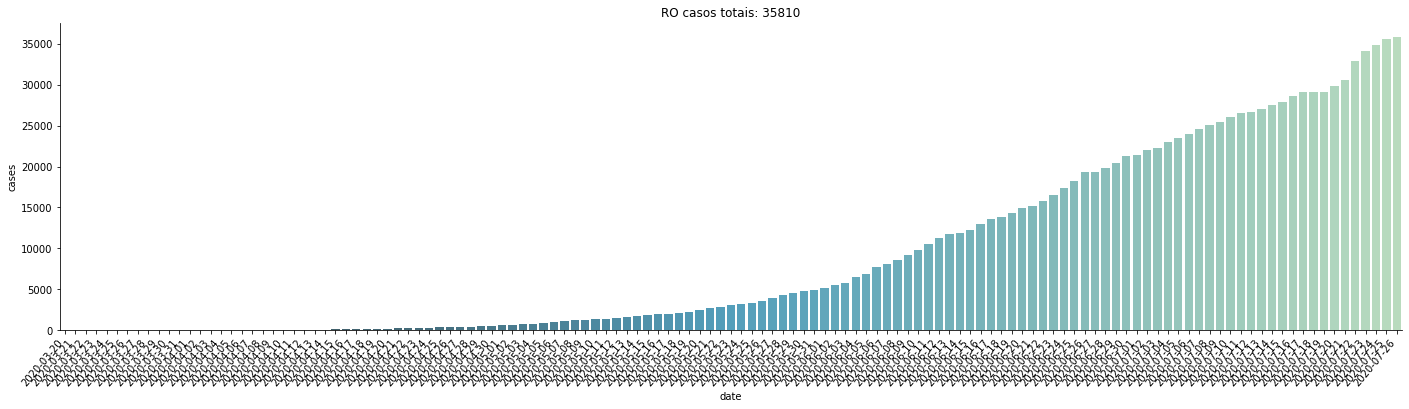

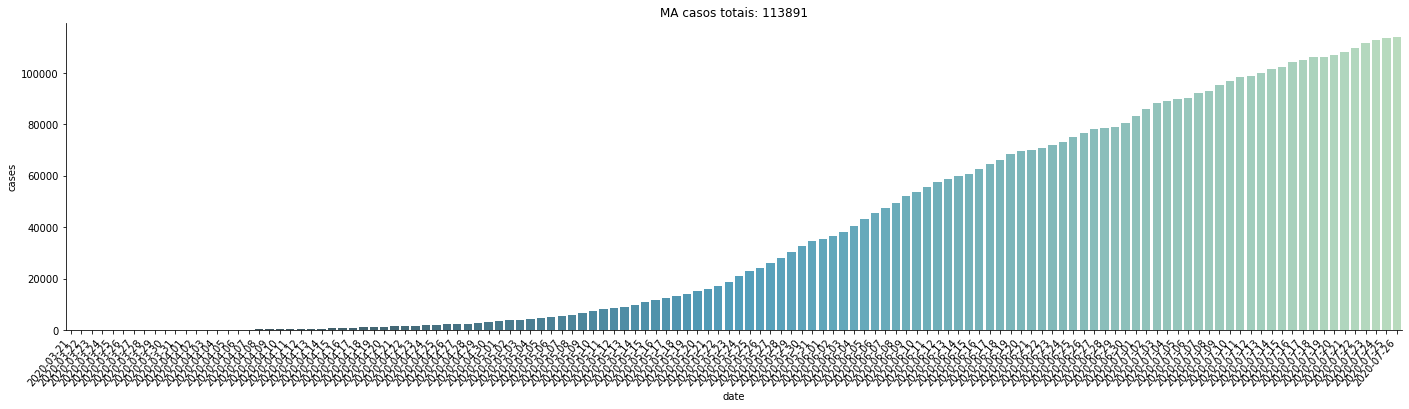

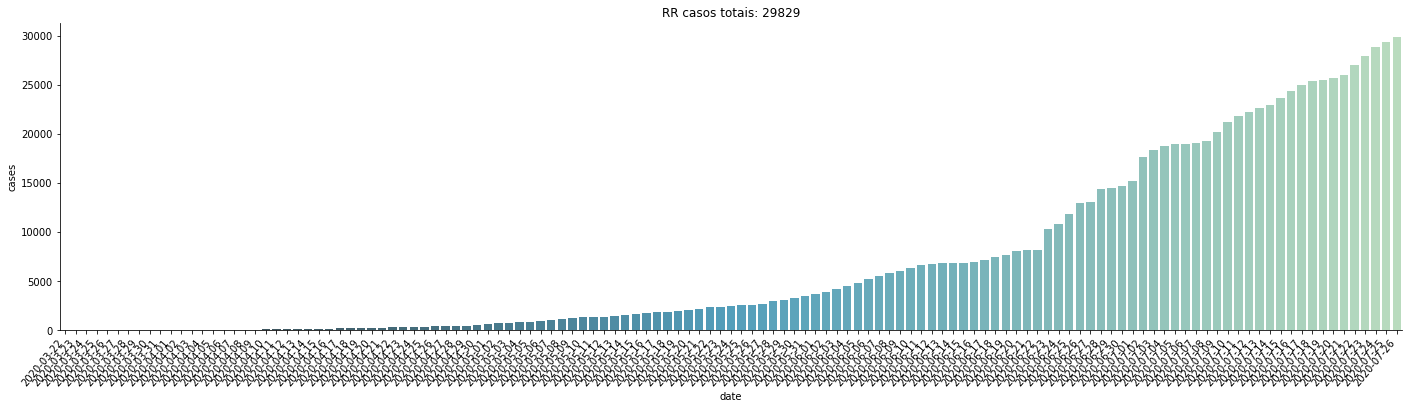

In [ ]:
import matplotlib.pyplot as plt
for i in range(len(d)):
  p = sns.catplot(x='date',y='cases', data=dadosPorEstado[d[i]],
                  kind='bar',palette="GnBu_d",
                  aspect=4)
  for ax in p.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(50)
        label.set_horizontalalignment('right')
  Casos_confimados = dadosPorEstado[d[i]]['cases']
  Casos_confimados.index = range(Casos_confimados.shape[0])
  plt.title(d[i]+' casos totais: '+str(Casos_confimados[Casos_confimados.shape[0]-1]))
  print(p)

## Numero de mortes

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


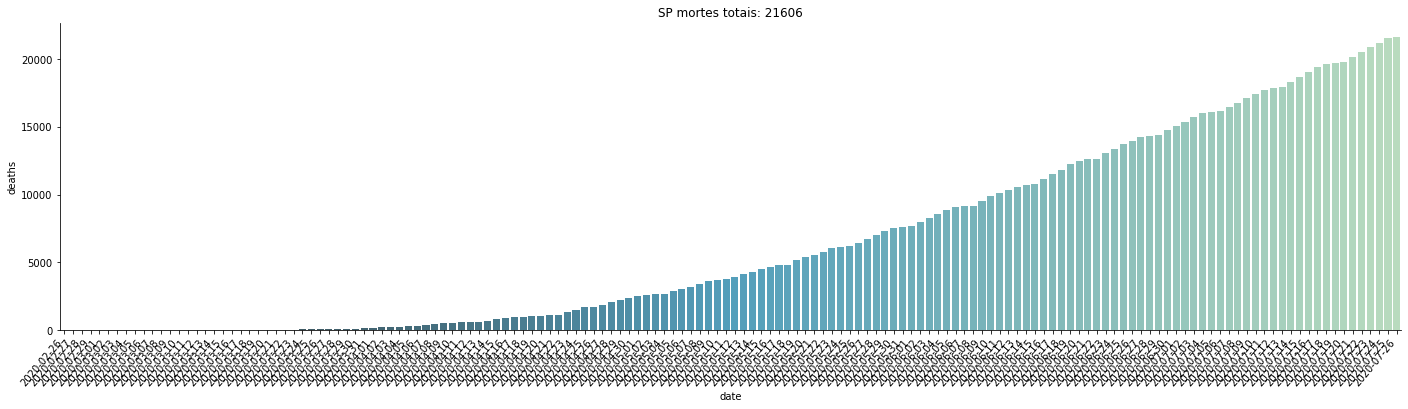

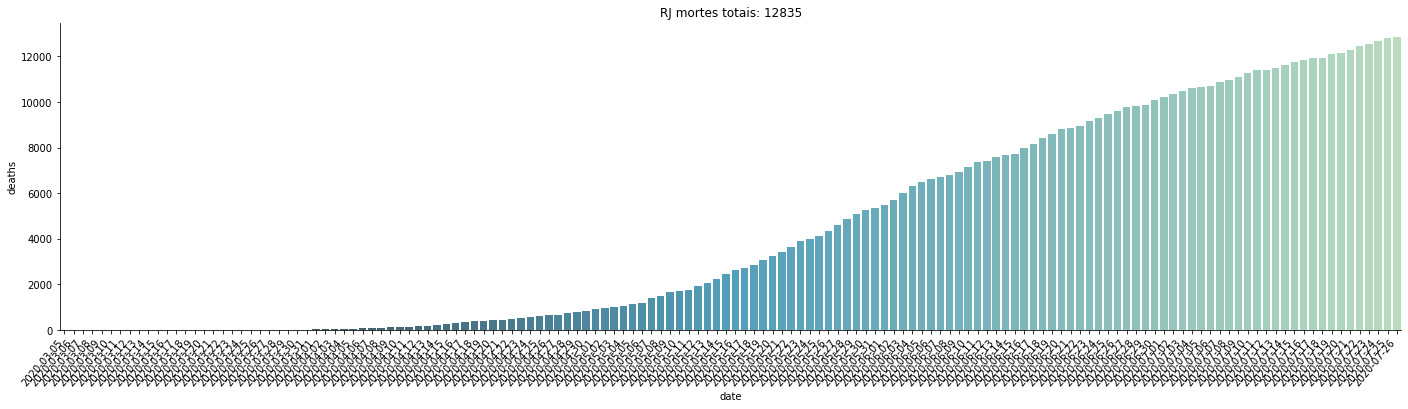

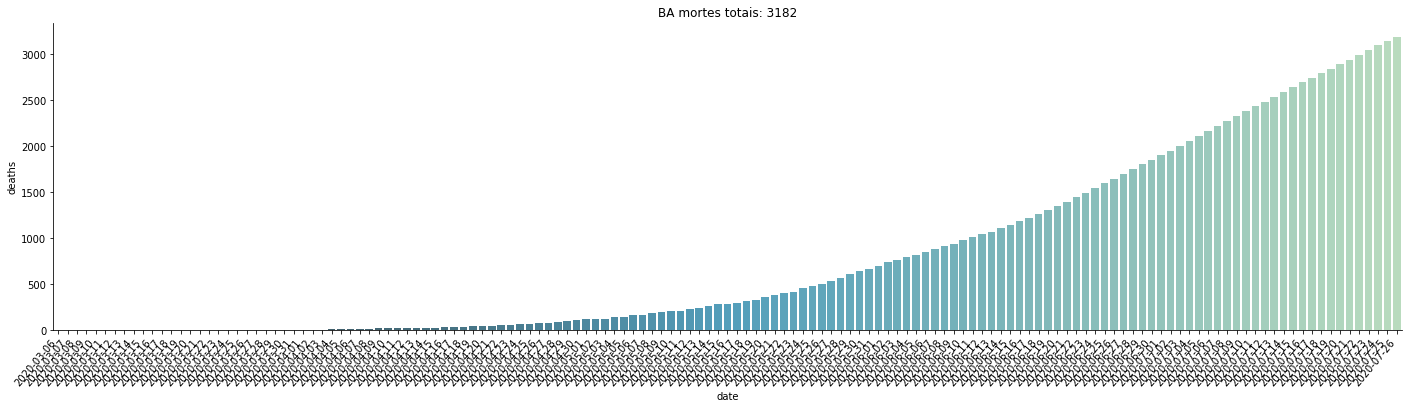

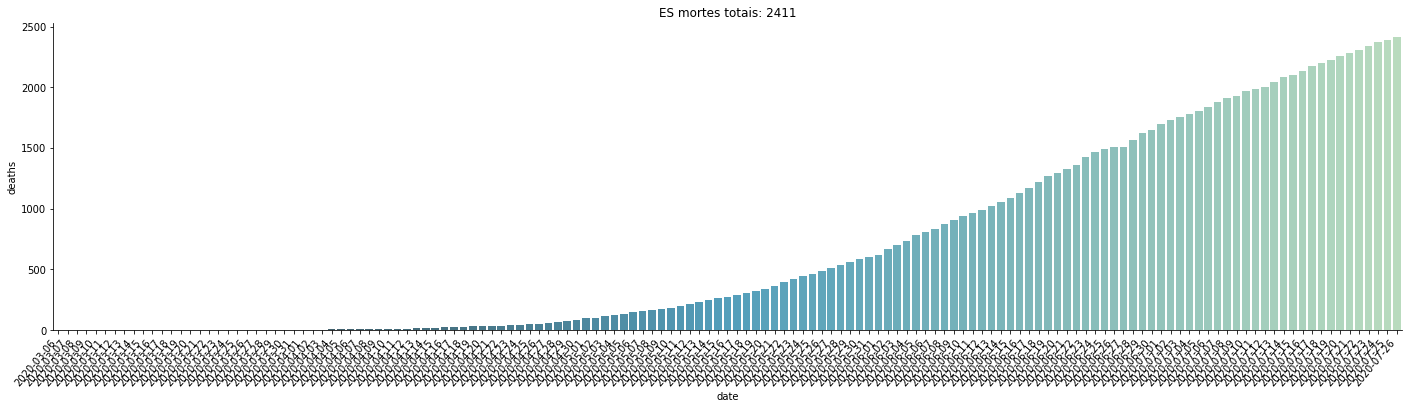

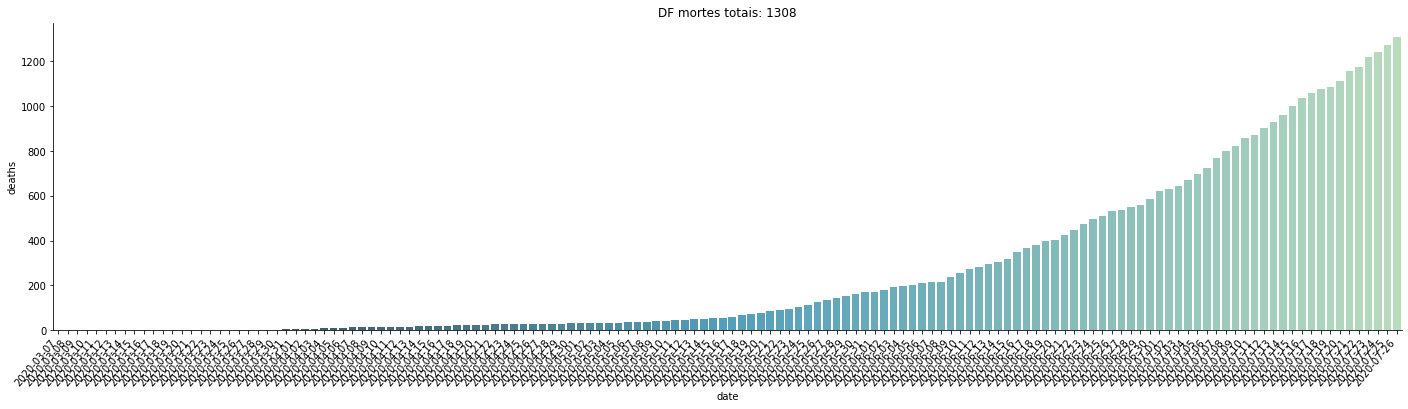

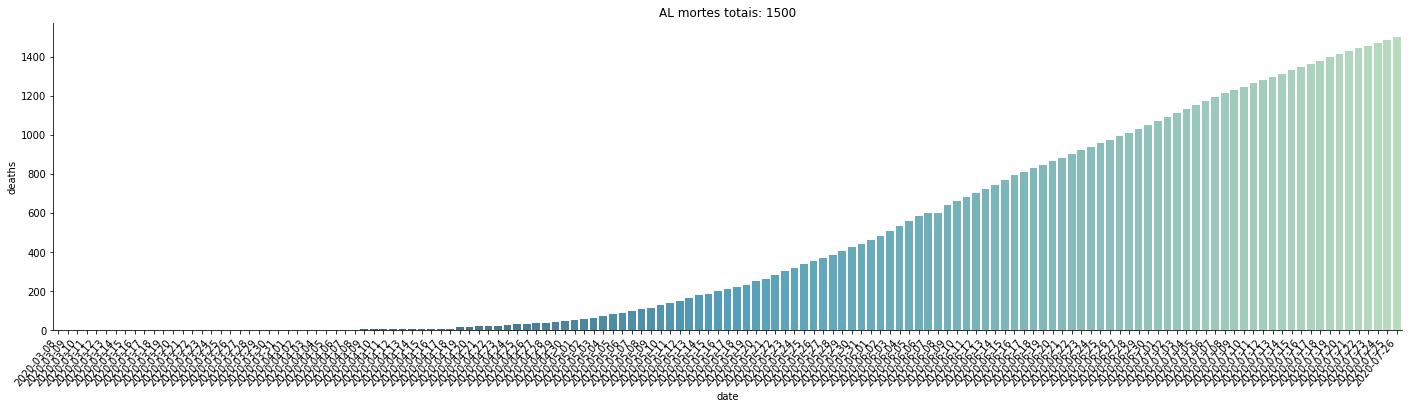

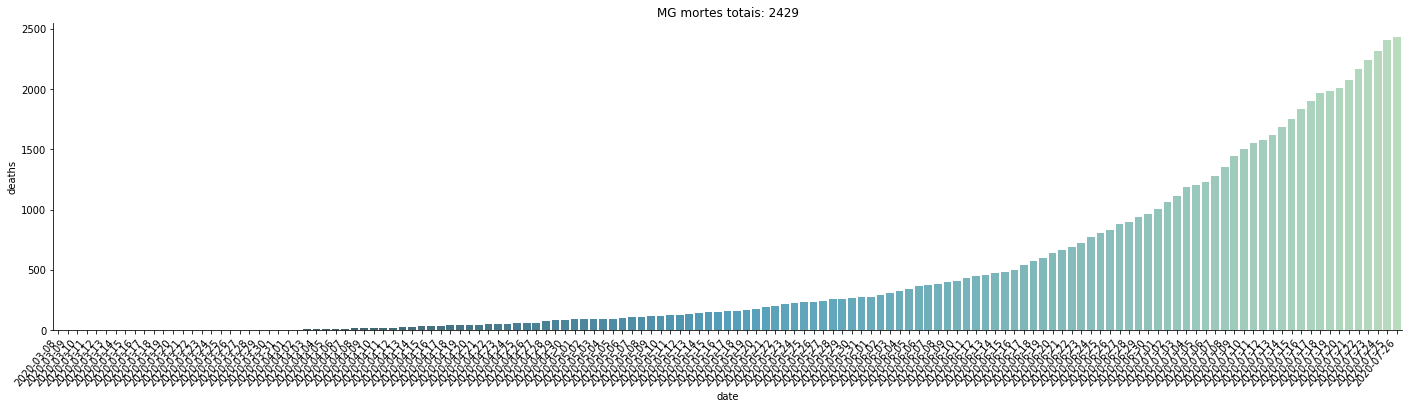

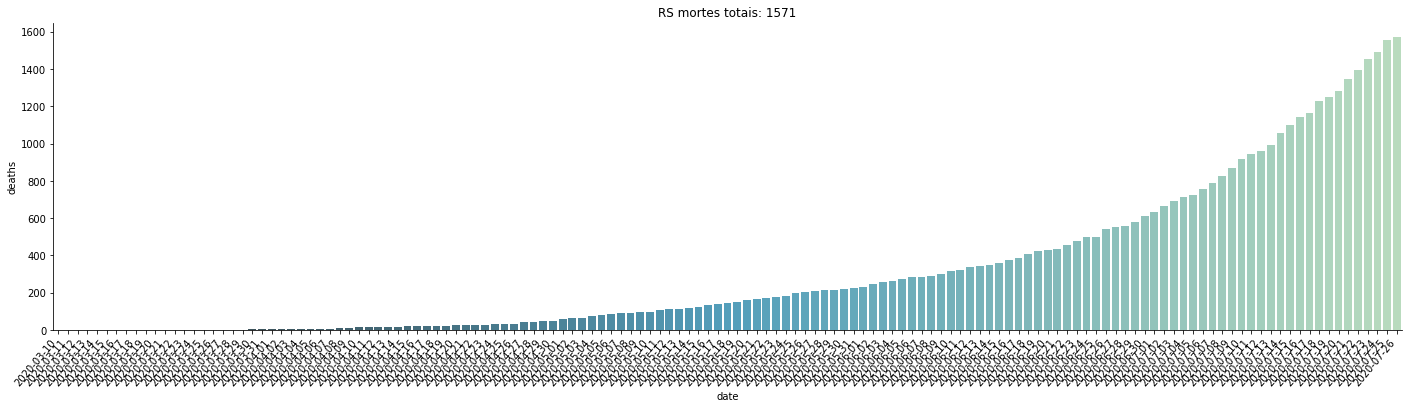

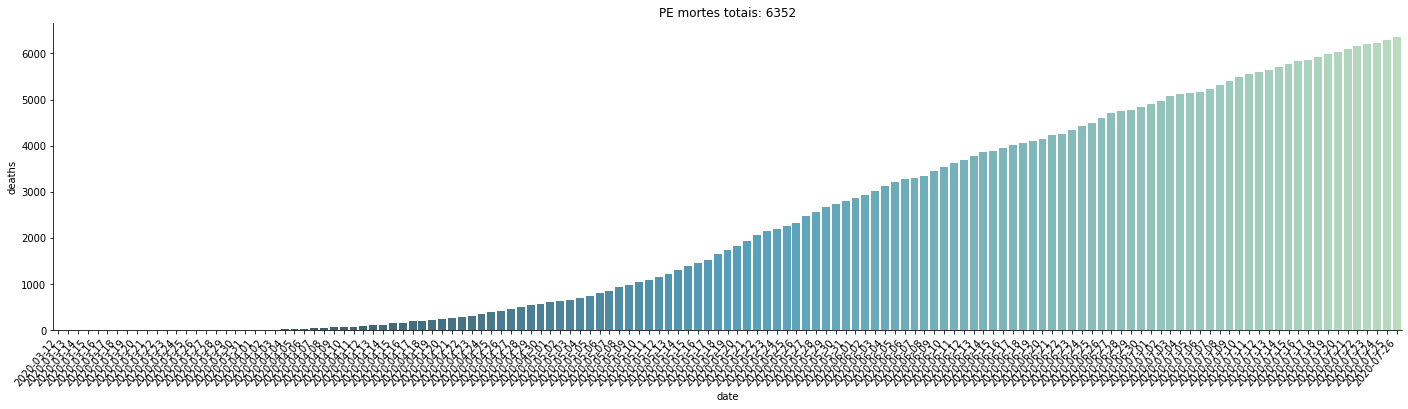

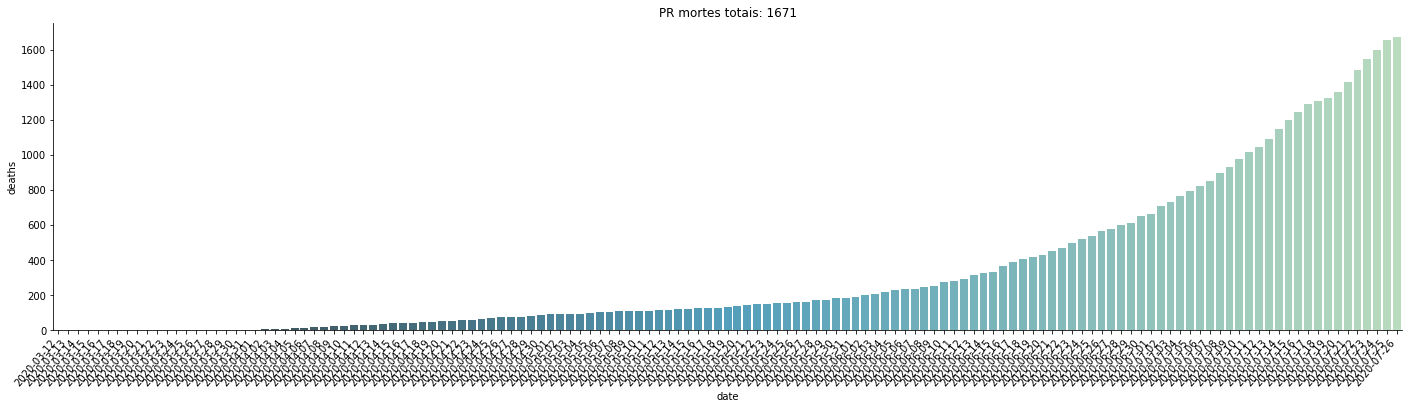

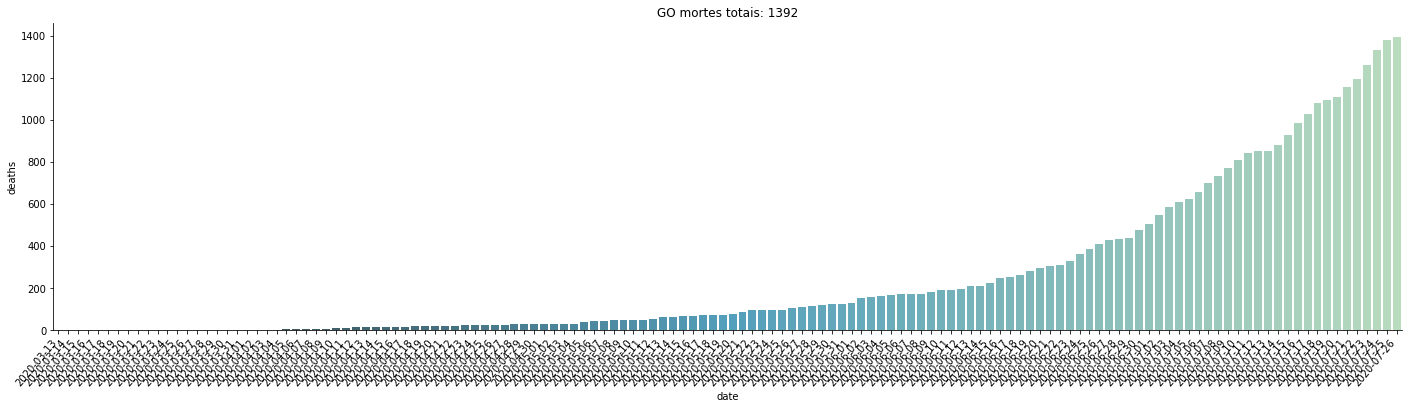

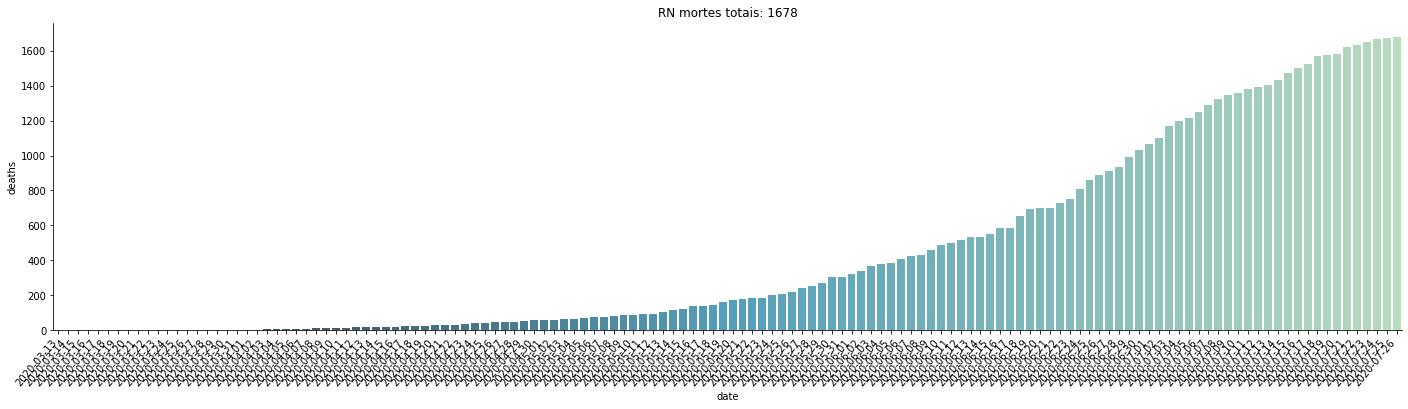

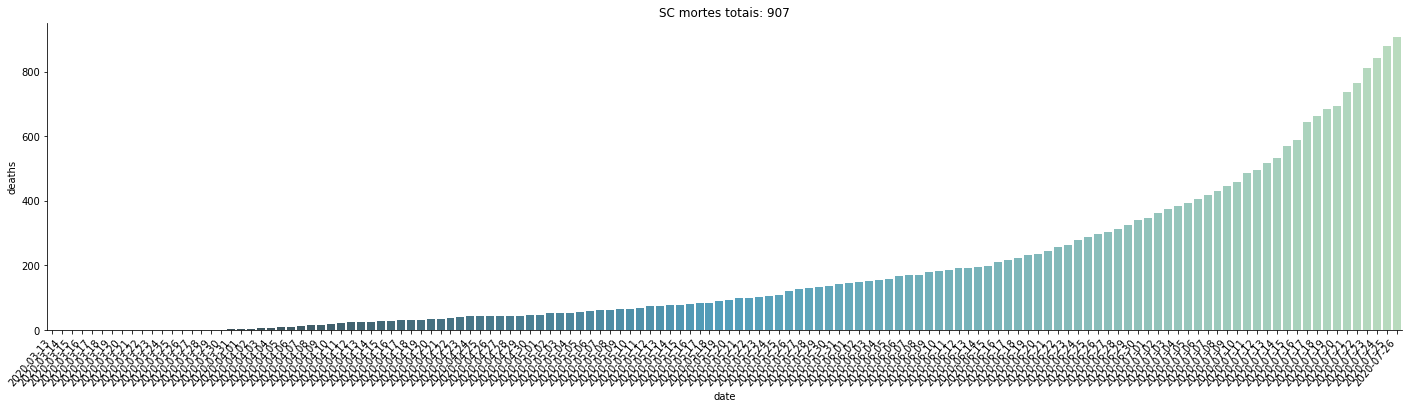

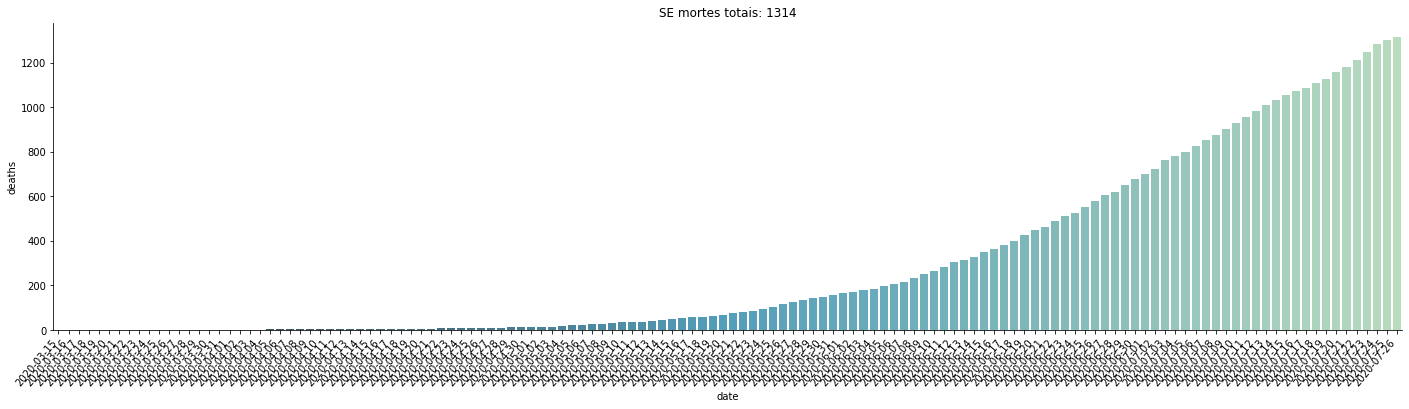

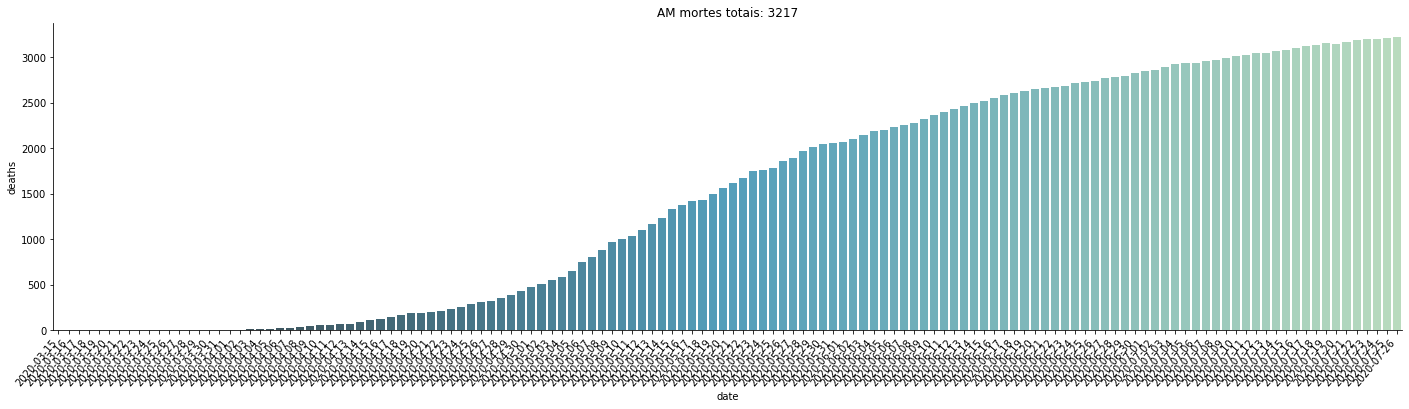

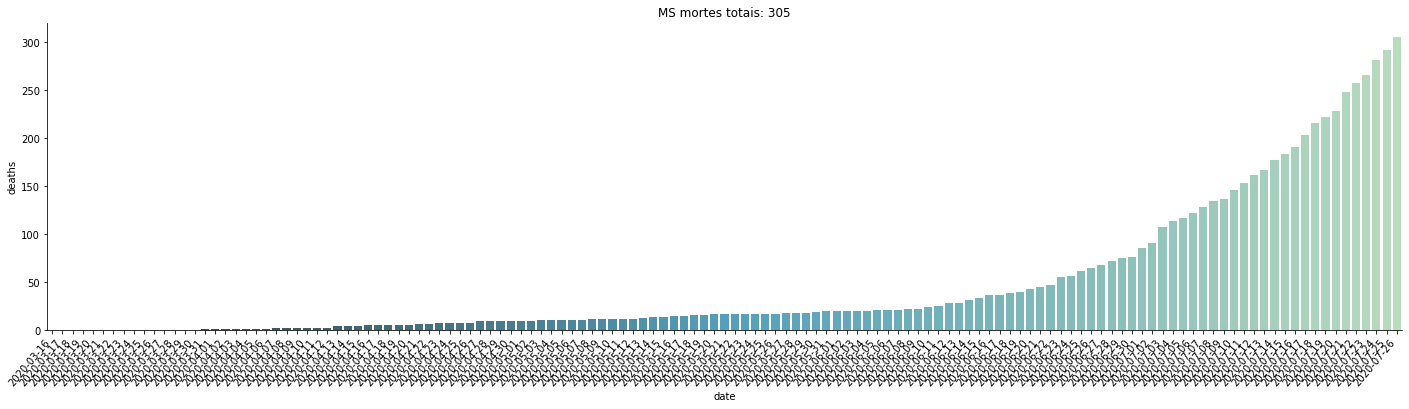

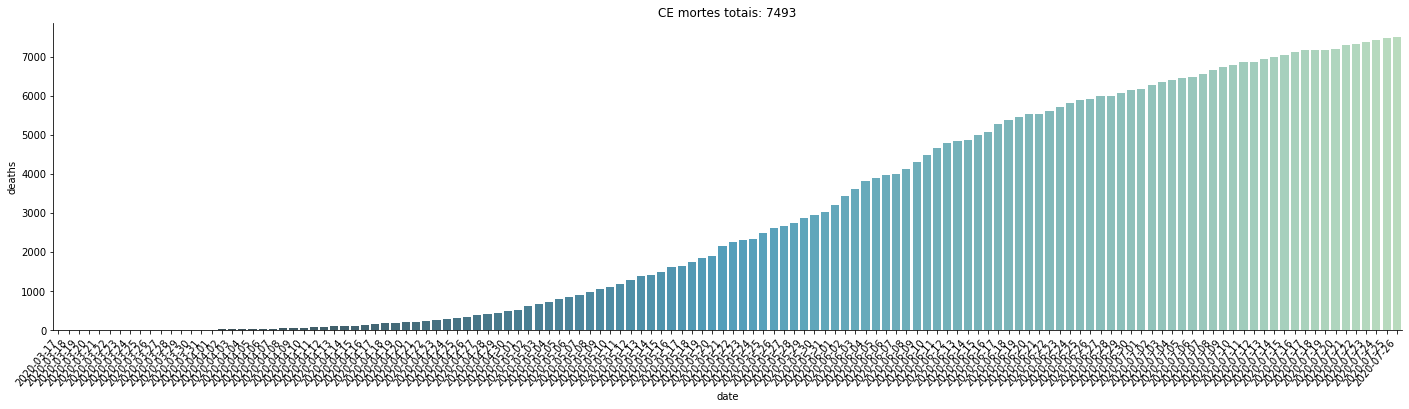

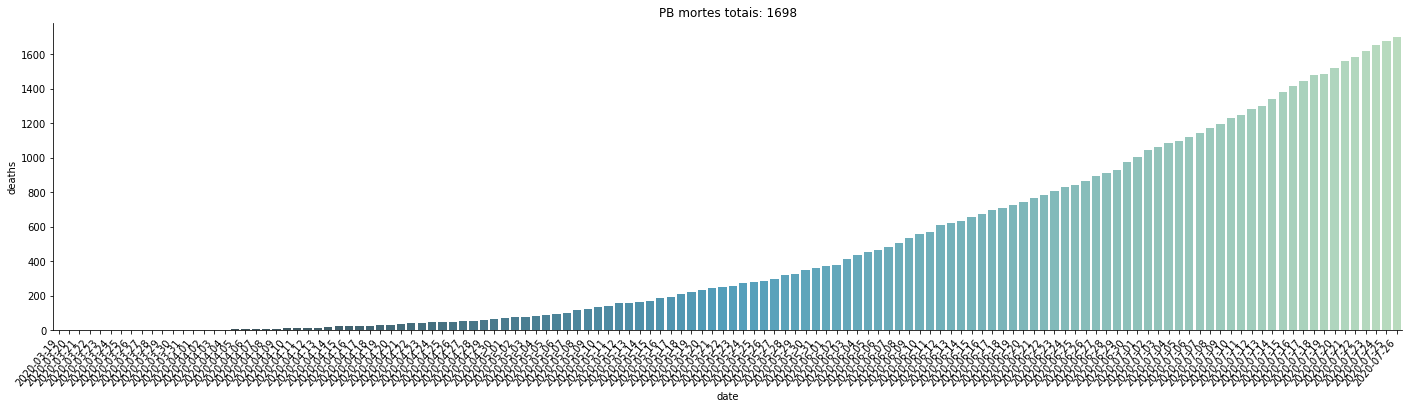

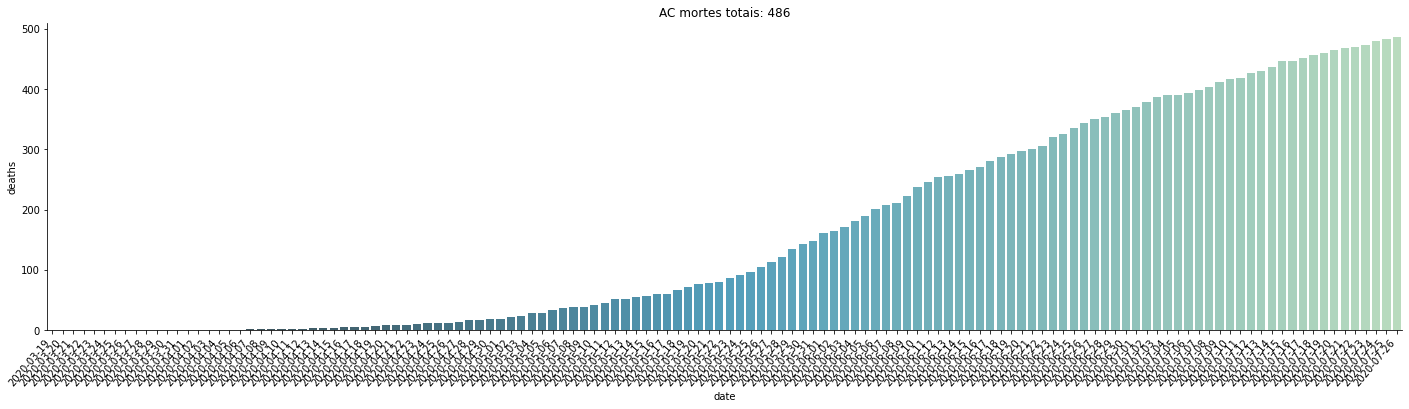

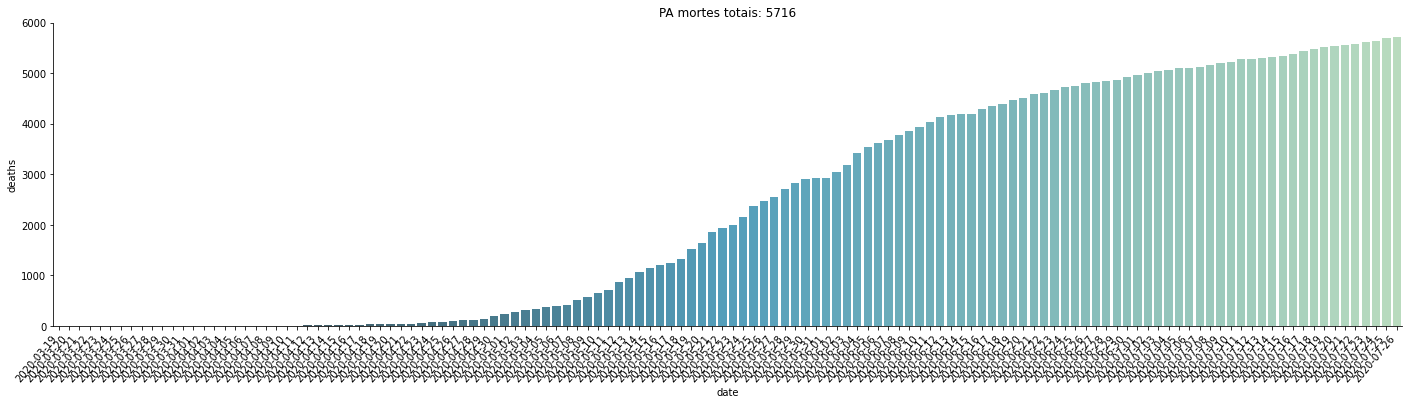

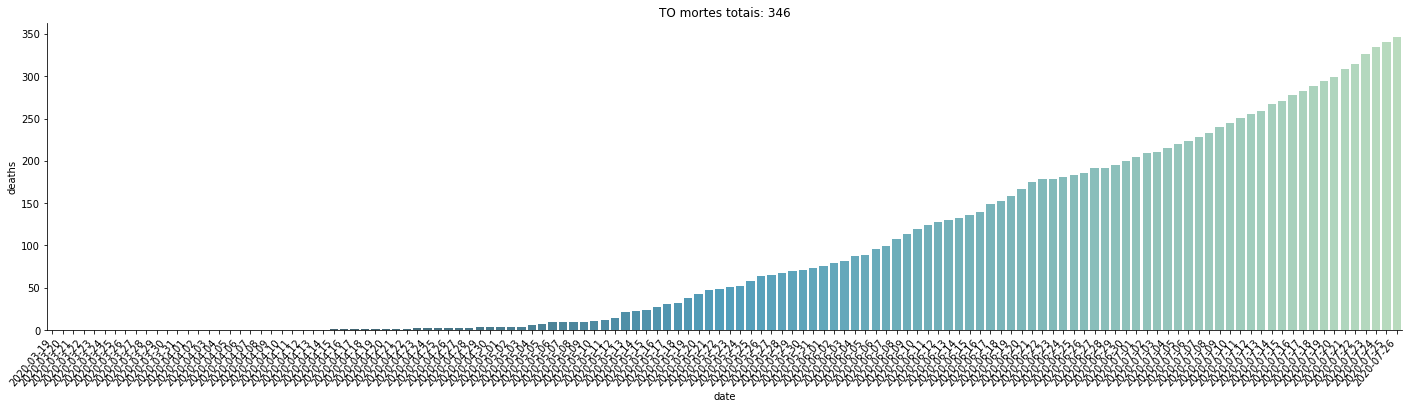

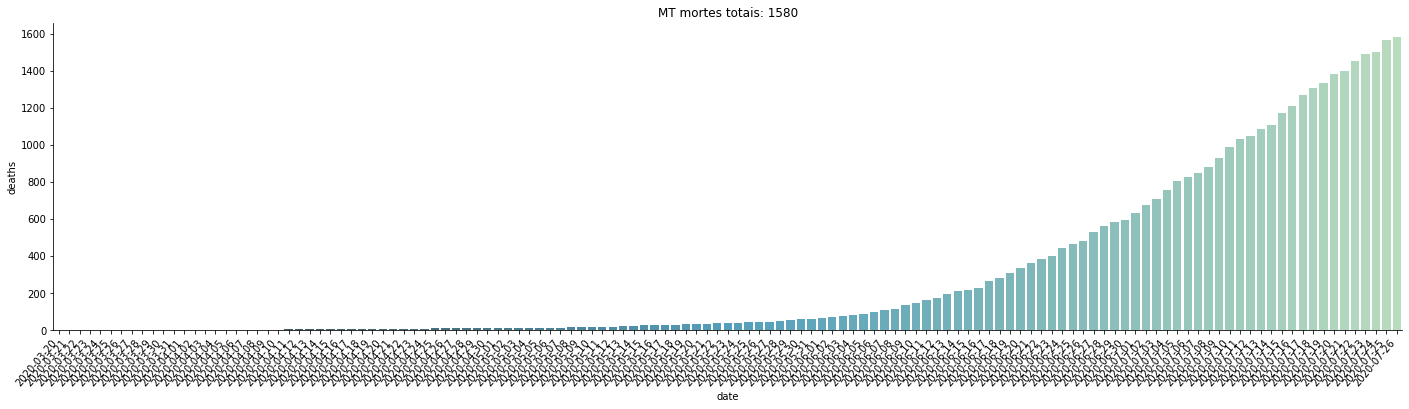

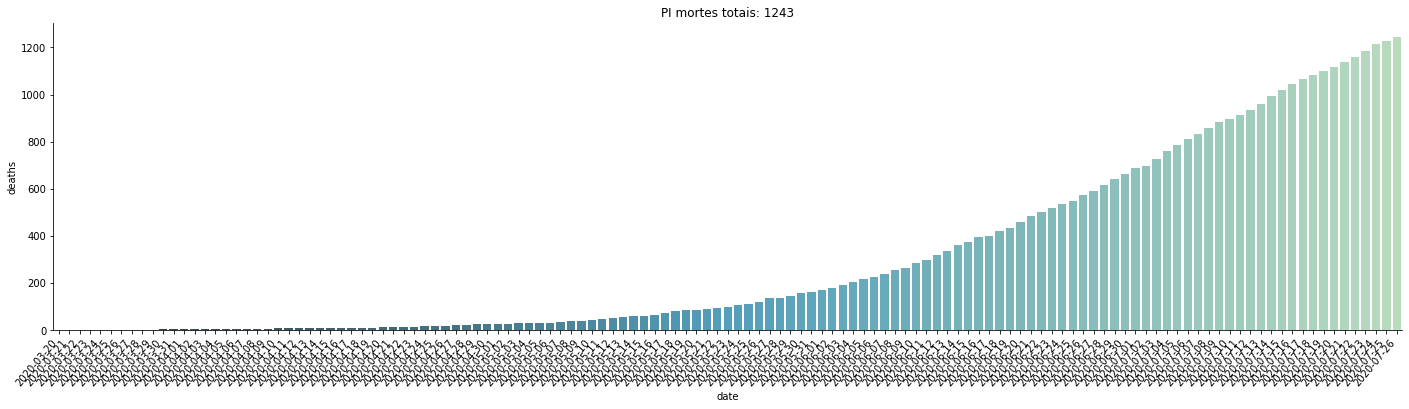

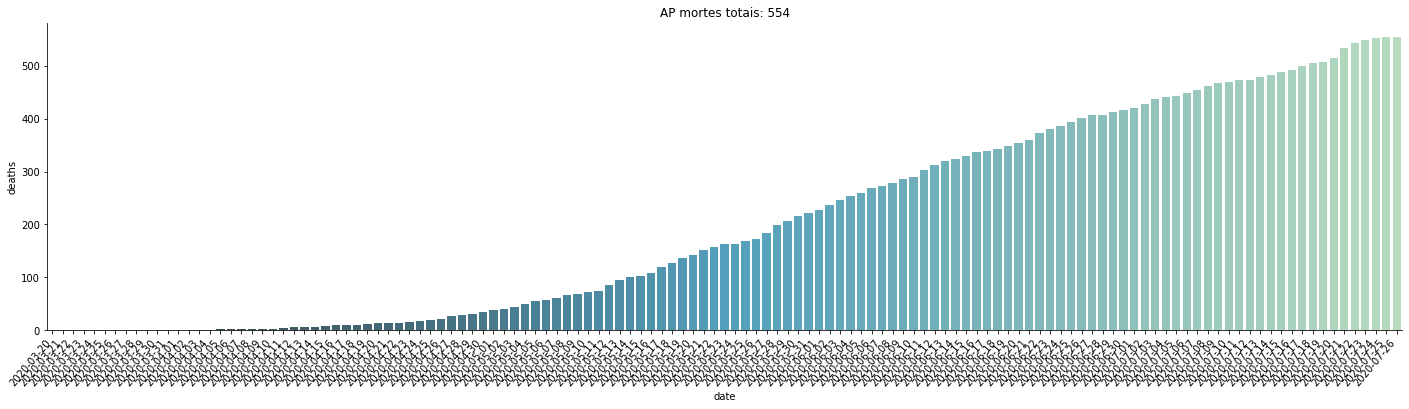

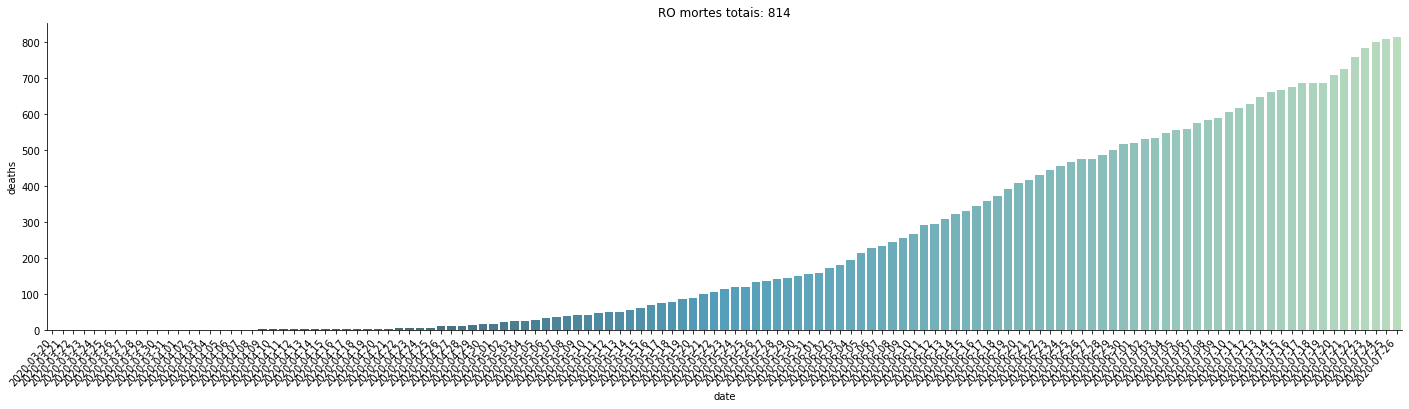

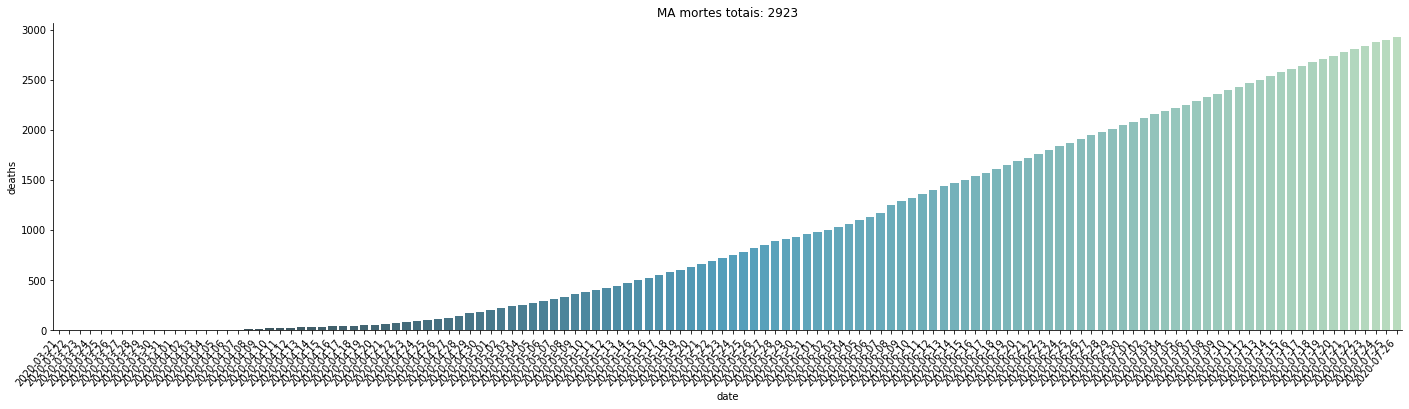

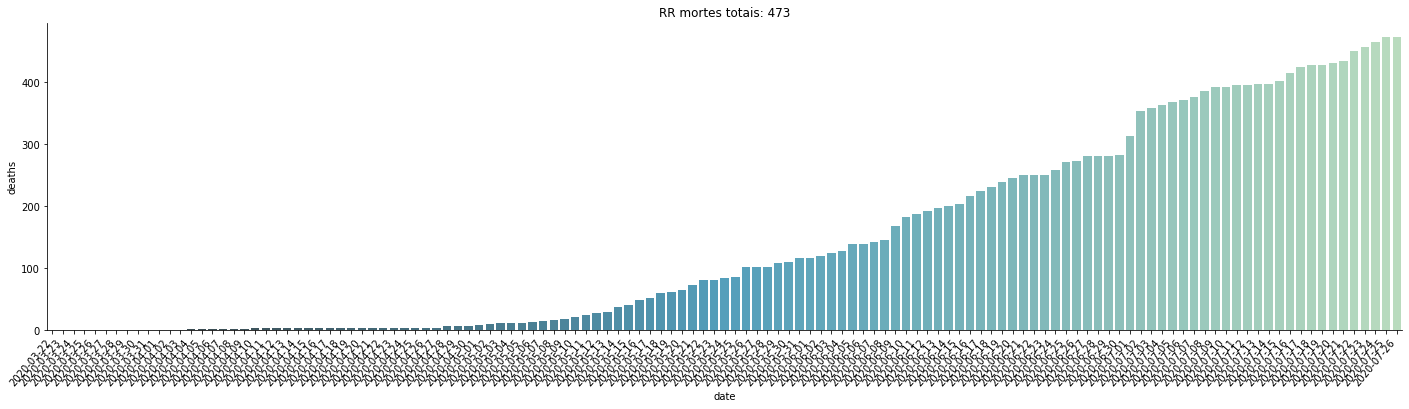

In [ ]:
for i in range(len(d)):
  p = sns.catplot(x='date',y='deaths', data=dadosPorEstado[d[i]],
                  kind='bar',palette="GnBu_d",
                  aspect=4)
  for ax in p.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(50)
        label.set_horizontalalignment('right')
  Mortes_confirmadas = dadosPorEstado[d[i]]['deaths']
  Mortes_confirmadas.index = range(Mortes_confirmadas.shape[0])
  plt.title(d[i]+' mortes totais: '+str(Mortes_confirmadas[Mortes_confirmadas.shape[0]-1]))
  print(p)

In [ ]:
d[0]
Mortes_confirmadas[Mortes_confirmadas.shape[0]-1]

473

# Regressão não Linear

In [ ]:
df_Bdata["dias"] = range(1,df_Bdata["data"].shape[0]+1)
df_Bdata.head()

,data,casos,dias
0,2020-02-26,1,1
1,2020-02-27,1,2
2,2020-02-28,1,3
3,2020-02-29,2,4
4,2020-03-01,2,5


In [ ]:
df_Bdatad["dias"] = range(1,df_Bdatad["data"].shape[0]+1)
df_Bdatad.head()

,data,deaths,dias
0,2020-02-26,0,1
1,2020-02-27,0,2
2,2020-02-28,0,3
3,2020-02-29,0,4
4,2020-03-01,0,5


# Regressão dos casos

In [ ]:
x= np.array(df_Bdata.dias)
x = x.reshape(-1,1)
y = df_Bdata.casos

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

SEED = 20
np.random.seed(SEED)
raw_treino_x,raw_teste_x,treino_y,teste_y = train_test_split(x,y,test_size=0.25)

scaler= StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVR()
modelo.fit(treino_x, treino_y)
score = modelo.score(teste_x,teste_y)
score


-0.5565320027011071